<a href="https://colab.research.google.com/github/Abhaysinghgithub/Abhaysinghgithub/blob/main/Seoul_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### **Date :** year-month-day
* ### **Rented Bike count -** Count of bikes rented at each hour
* ### **Hour -** Hour of he day
* ### **Temperature-** Temperature in Celsius
* ### **Humidity -** %
* ### **Windspeed -** m/s
* ### **Visibility -** 10m
* ### **Dew point temperature -** Celsius
* ### **Solar radiation -** MJ/m2
* ### **Rainfall -** mm
* ### **Snowfall -** cm
* ### **Seasons -** Winter, Spring, Summer, Autumn
* ### **Holiday -** Holiday/No holiday
* ### **Functional Day -** NoFunc(Non Functional Hours), Fun(Functional hours)

In [7]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [8]:
df = pd.read_csv('/content/SeoulBikeData.csv', encoding= 'unicode_escape')

In [9]:
# Viewing the Data of top 5 rows
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [10]:
#Viewing the data of bottom 5 rows
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [11]:
#viewing the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [12]:
# Viewing the shape of Dataset
df.shape

(8760, 14)

In [13]:
#Viewing the numerical details
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [14]:
#Viewing all the columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [15]:
# Viewing duplicate value
df.duplicated().sum()

0

In [16]:
#Print the unique value
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [17]:
# Viewing The Relation Between Numerical Columns
corr = df.corr()

# **Features Explanation and it's Data Type**


---




*   **Rented Bike Count:** This is dependet Variable and showsnumber of bike count per hour.
*   **Date:** Date Range in this dataset between 01/12/2017 to 30/11/2018.


*   **Hour:** In this dataset hour is in digital format.
*   **Seasons:** There are four seasons are shown in this dataset.

*  **Temperature:** Temperature shows in celsius. 

*   **Snowfall:** it shows amount of snowfall in cm.

*   **Rainfall:** It shows rainfall in mm.
*  **Wind speed:** It shows windspeed in m/s.


*   **Solar Radition:** It shows Solar radition intensity.


*   **Dew point temperature:** At this point the air cannot hold more water in the gas form.


*   **Visibility:** Visibility is in meter.

*  **Humidity:** it shows the amount of water vapour in the air.

*   **Holiday:** It shows if its during holiday.
*   **Functioning day:** It shows if the day is functioning or not.


   


  













   
 






 
  














 **A) This Dataset contains 8760 rows and 14 Columns.**

# **Preprocessing the dataset**
 Why do we need to handle the missing value?

The problem of missing value is quite common in many real-life datasets and Missing value can bias the results of the machine learning models and reduce the accuracy of the model.

# Missing Values

In [18]:
#Check the any missing value in each columns
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Breaking Date Column

In [19]:
#Changning thr Date Column into three Year,Month,Day column
df['Date'] = df['Date'].apply(lambda x:
                          dt.datetime.strptime(x,'%d/%m/%Y'))

In [20]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [21]:
# change numerical column into categorical column
column_name = ['Hour','month','day','year']
for columns in column_name:
  df[columns]= df[columns].astype('category')

A) So We Convert the Data into 3 diffrent column i.e Year,Month,Day.

B) The year Column Contain basically 2 unique number from 2017 Dec to Dec 2018.

C) There are total 12 months.




# **Exploratory Data Analysis Of The Data Set**

Why is EDA Important?

Exploratory data analysis is essential for any business. It allows data   scientists to analyze the data before coming to any assumption. It ensures that the results produced are valid and applicable to business outcomes and goals.

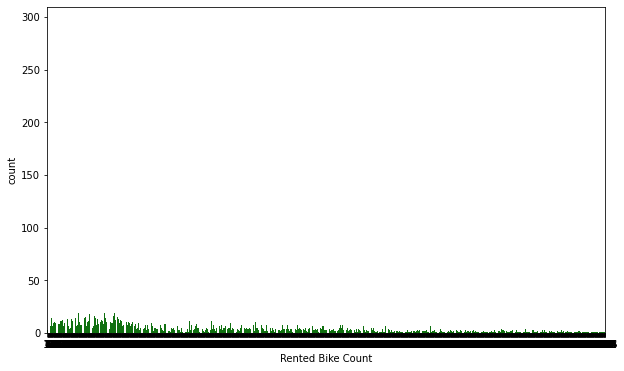

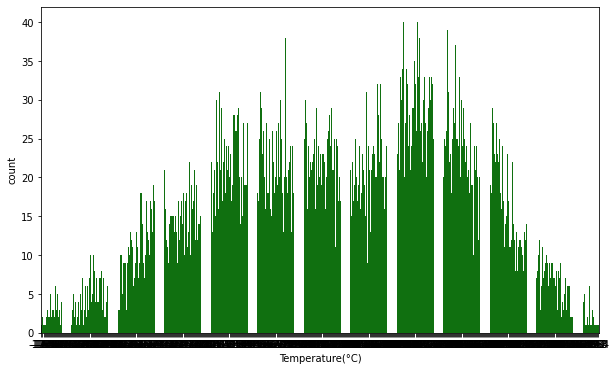

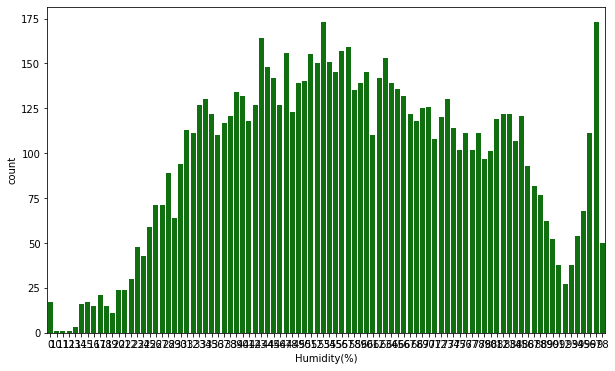

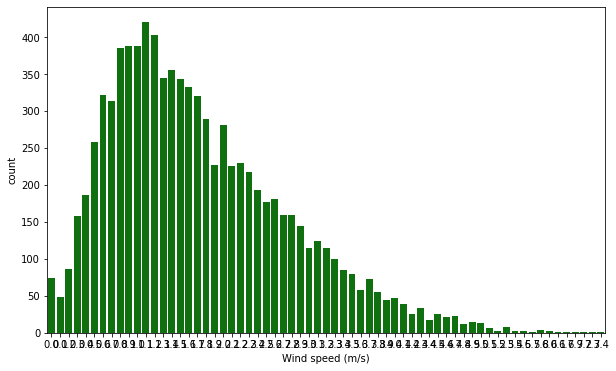

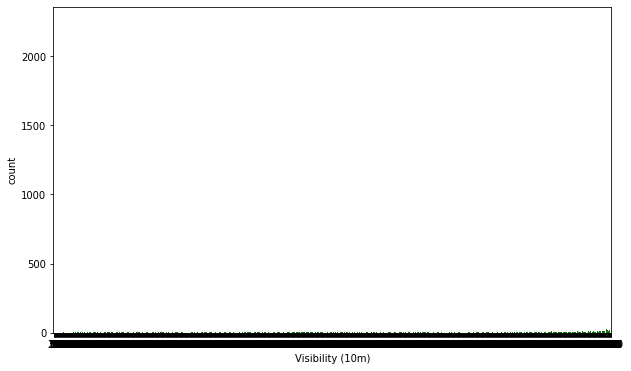

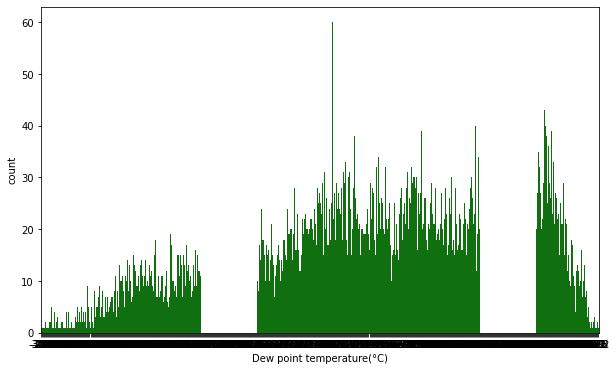

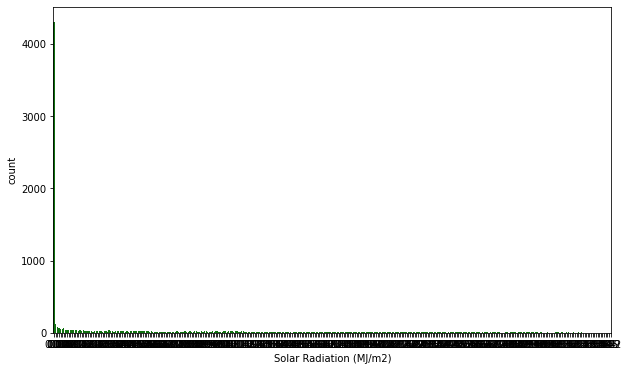

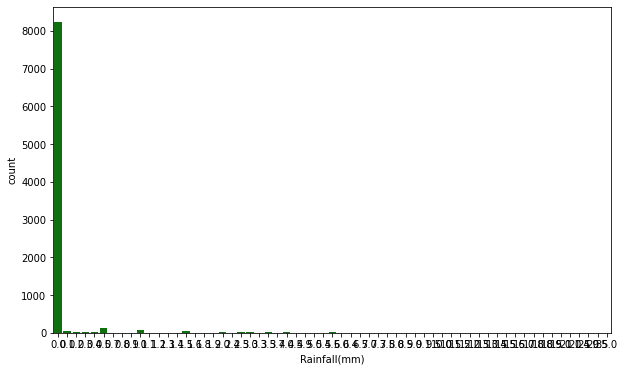

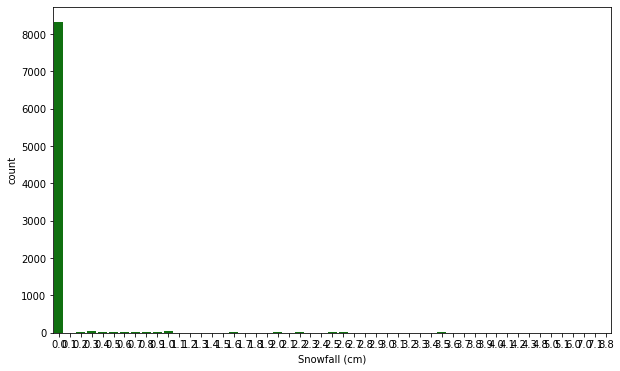

In [27]:
# Analysis for all numerical features
for col in numerical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=df[col],color='g')
plt.show()
   


Text(0.5, 1.0, 'Count of bikes in holidays')

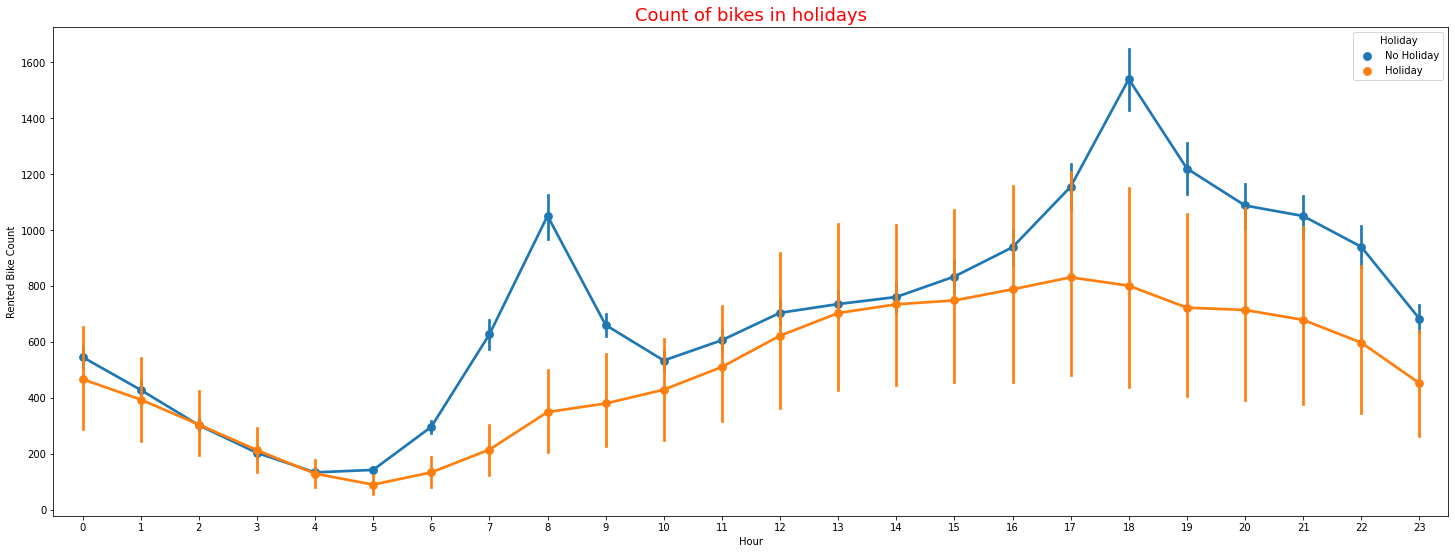

In [24]:
#Analysis of data by visualization
plt.figure(figsize=(25,9))
ax=sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday')
ax.set_title('Count of bikes in holidays',size=18,color='red')


Text(0.5, 1.0, 'Count of bikes in Diffrent seasons')

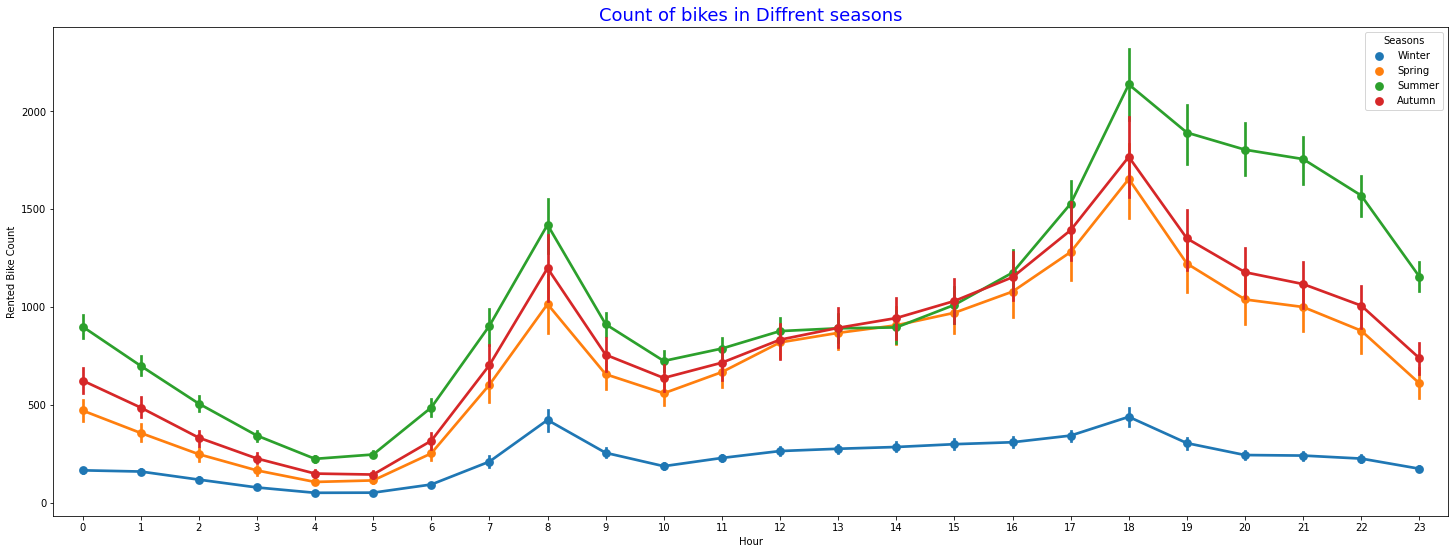

In [25]:
plt.figure(figsize=(25,9))
ax=sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons')
ax.set_title('Count of bikes in Diffrent seasons',size=18,color='blue')

**Analyze of numerical column** 

In [26]:
numerical_features = df.describe().columns
numerical_features 

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

Text(0.5, 1.0, 'Count of bikes during diffrent month')

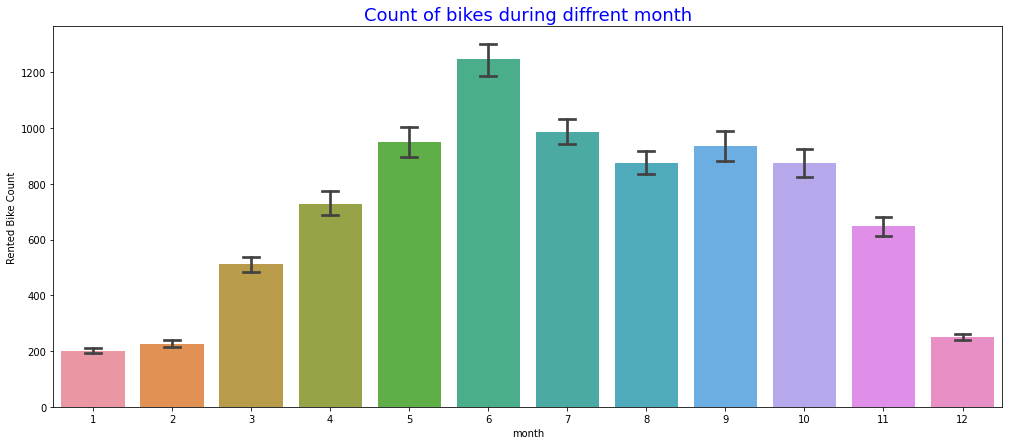

In [28]:
# count of bikes in diffrent month
plt.figure(figsize=(17,7))
ax=sns.barplot(data=df,x='month',y='Rented Bike Count',capsize=0.2)
ax.set_title('Count of bikes during diffrent month',size=18,color='blue')

Text(0.5, 1.0, 'Count of bikes during diffrent days')

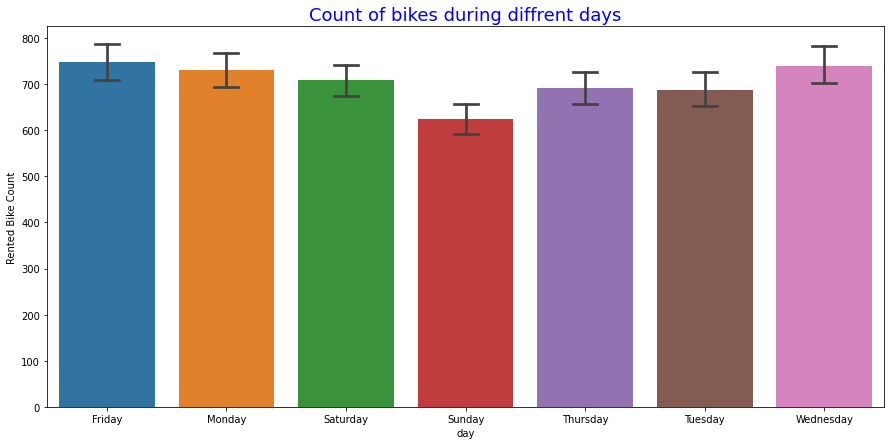

In [29]:
#plot count of bike durind days
plt.figure(figsize=(15,7))
ax=sns.barplot(data=df,x='day',y='Rented Bike Count',capsize=0.2)
ax.set_title('Count of bikes during diffrent days',size=18,color='blue')

Text(0.5, 1.0, 'Count of bikes during diffrent hours')

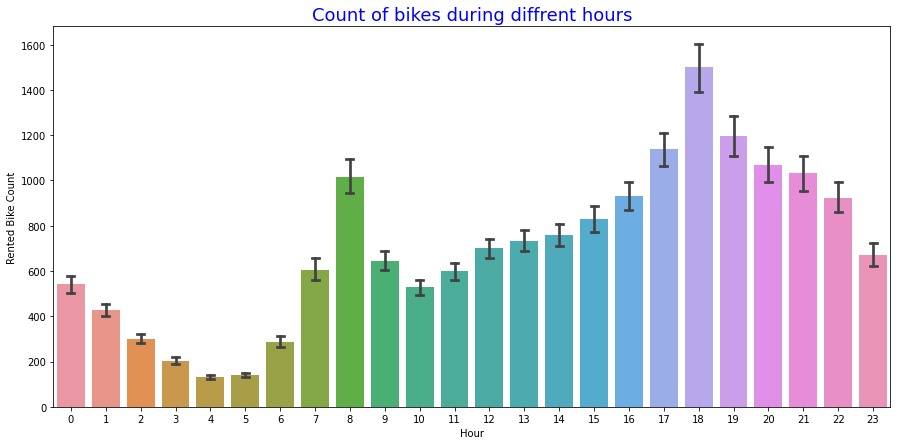

In [30]:
# count of bikes in diffrent hours
plt.figure(figsize=(15,7))
ax=sns.barplot(data=df,x='Hour',y='Rented Bike Count',capsize=0.2)
ax.set_title('Count of bikes during diffrent hours',size=18,color='blue')

Text(0.5, 1.0, 'Count of bikes during diffrent Year')

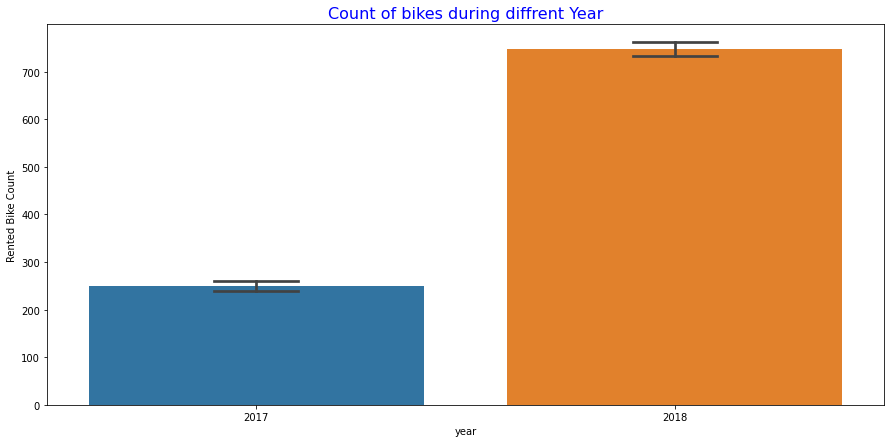

In [31]:
plt.figure(figsize=(15,7))
ax=sns.barplot(data=df,x='year',y='Rented Bike Count',capsize=0.2)
ax.set_title('Count of bikes during diffrent Year',size=16,color='blue')

[Text(0.5, 1.0, 'Relation Between Humidity And Users')]

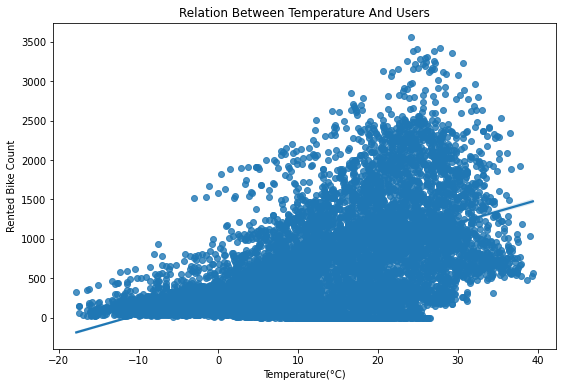

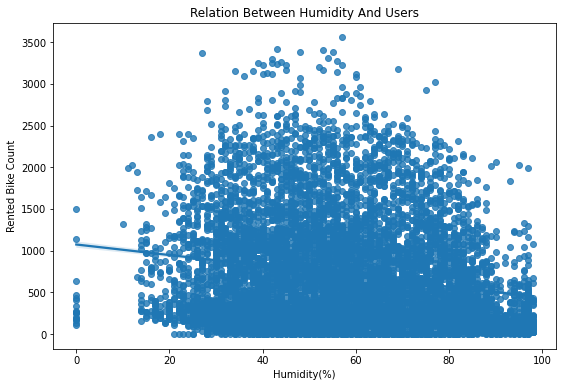

In [32]:
fig = plt.figure(figsize=(9, 6))
ax1=sns.regplot(x=df['Temperature(°C)'],y=df['Rented Bike Count'])
ax1.set(title='Relation Between Temperature And Users')
fig = plt.figure(figsize=(9, 6))
ax2=sns.regplot(x=df['Humidity(%)'],y=df['Rented Bike Count'])
ax2.set(title='Relation Between Humidity And Users')

In [33]:
from statsmodels.graphics.gofplots import qqplot
sns.distplot(df['Rented Bike Count'],ax=ax1)

ax1.set(title='Distrbution of the users')
qqplot(df['Rented Bike Count'],ax=ax2, line='s')
ax2.set(title='Therotical quantities')

[Text(0.5, 1.0, 'Therotical quantities')]

In [34]:
numeric_features = df.describe().columns
numeric_features 

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

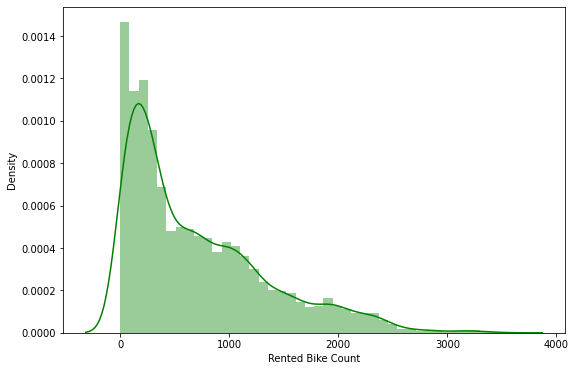

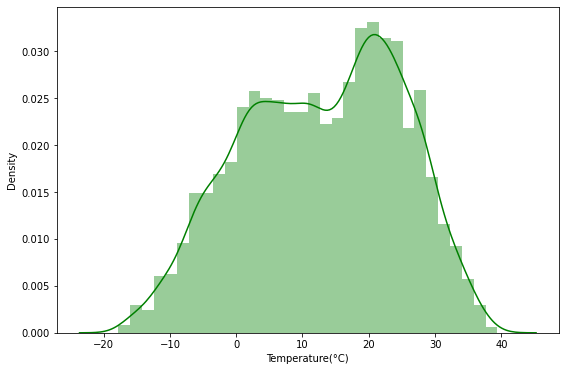

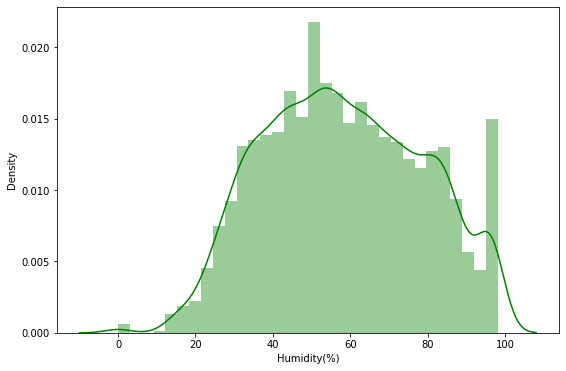

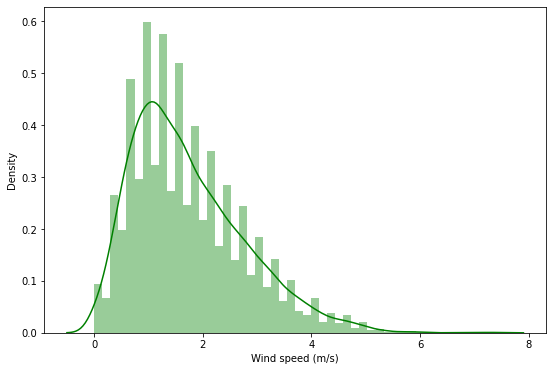

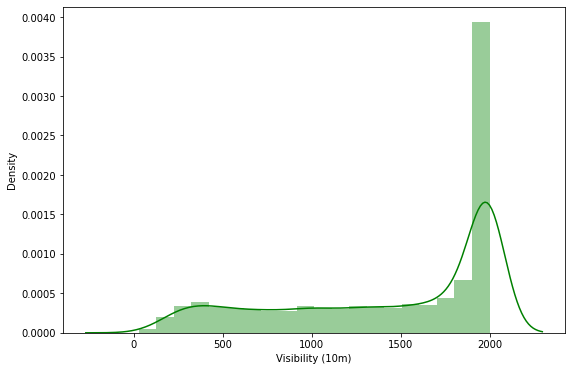

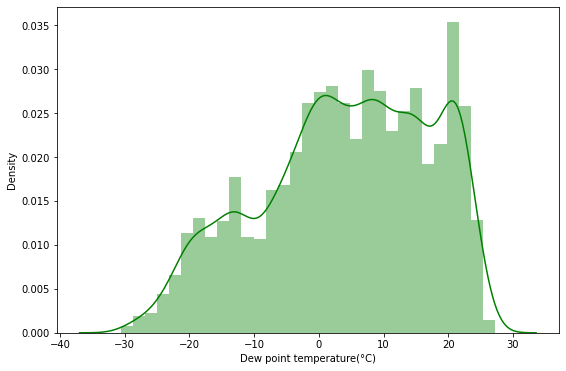

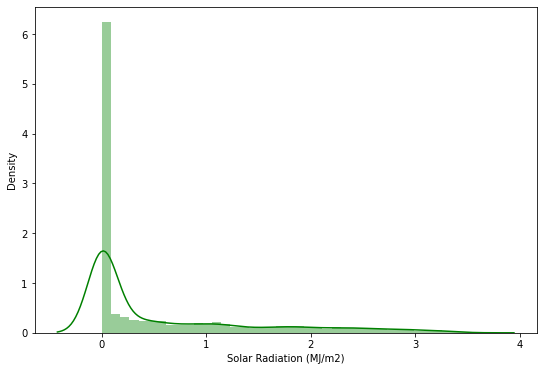

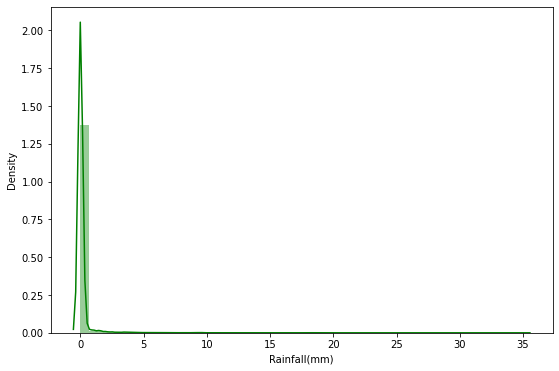

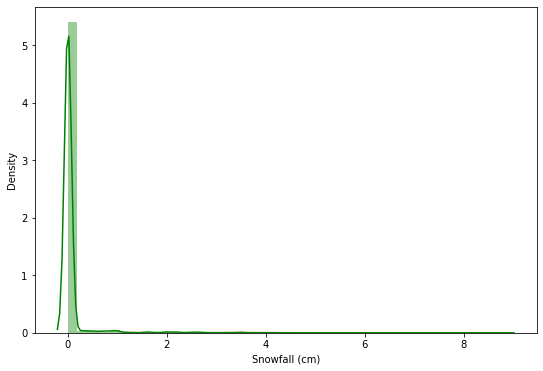

In [35]:
#Viewing distplot to analyze the distribution of all numerical features
for col in numeric_features:
  fig = plt.figure(figsize=(9, 6))
  sns.distplot(x=df[col],color='g')
  plt.xlabel(col)
plt.show()

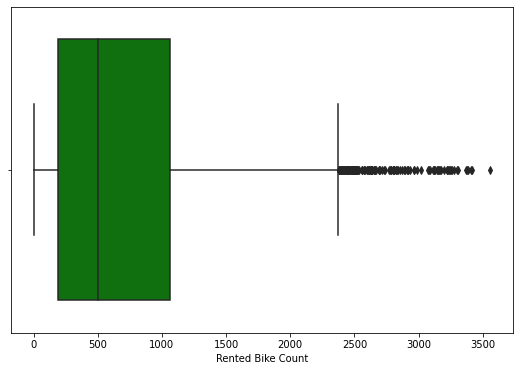

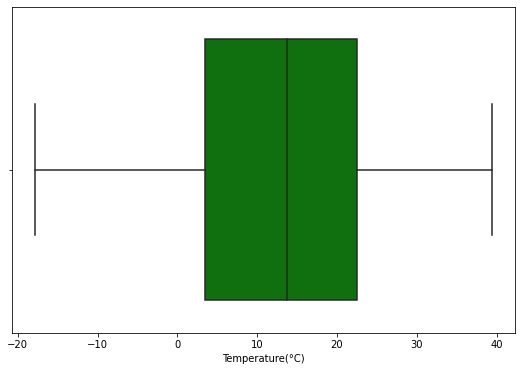

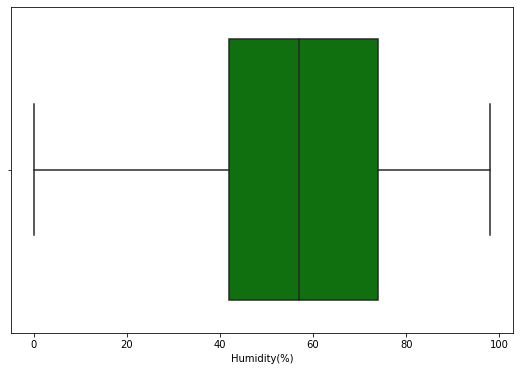

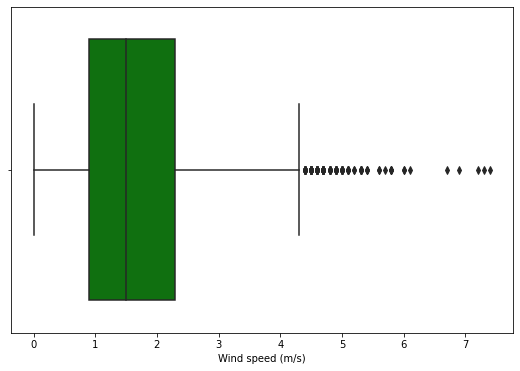

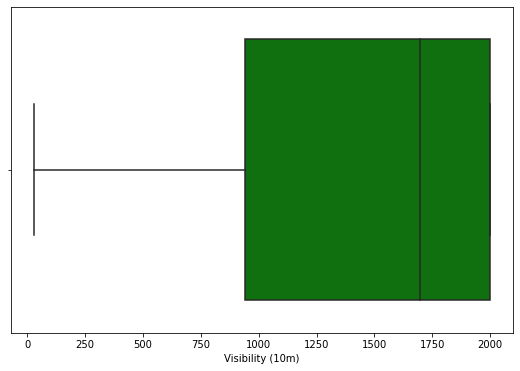

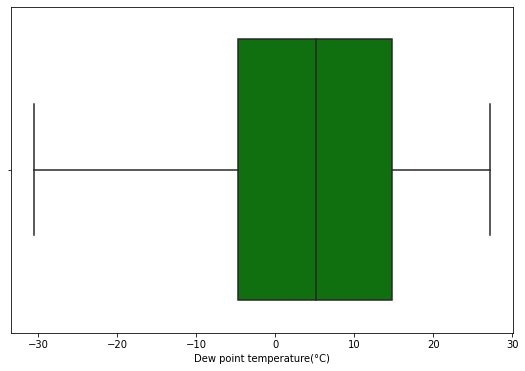

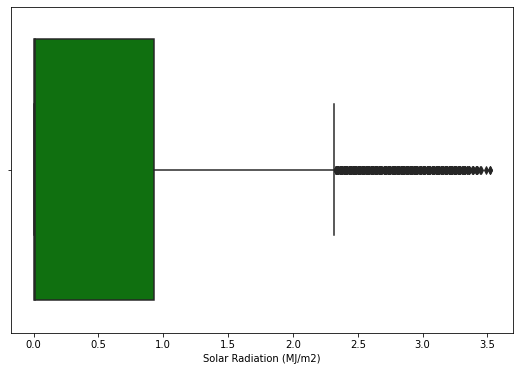

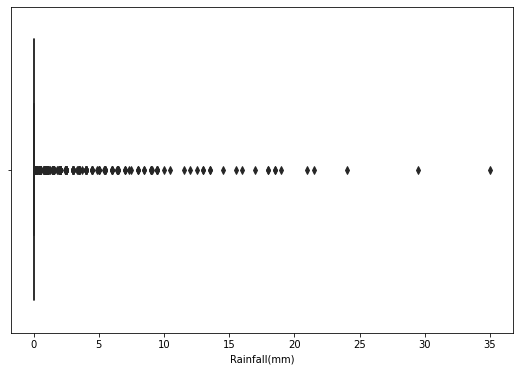

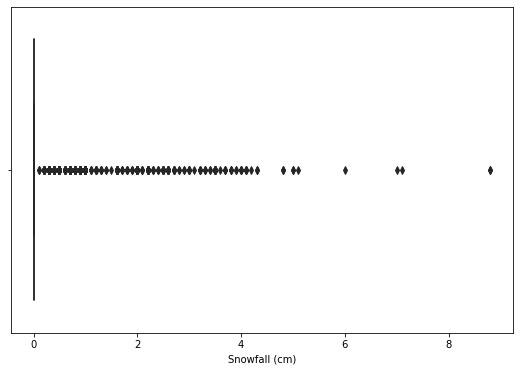

In [36]:
for col in numerical_features:
  fig = plt.figure(figsize=(9, 6))
  sns.boxplot(x=df[col],color='g')
plt.show()

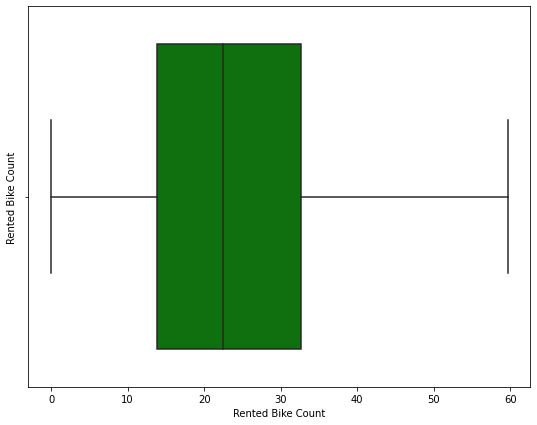

In [37]:
#After applying sqrt on Rented Bike Count 
plt.figure(figsize=(9,7))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']),color='g')
plt.show()

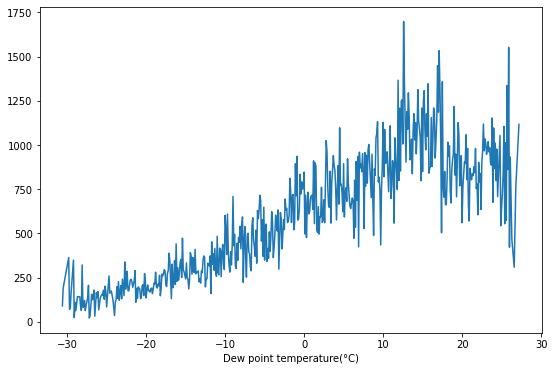

In [38]:
# Viewing the relation between Dew point temp and Rented bike count
fig = plt.figure(figsize=(9, 6))
df.groupby('Dew point temperature(°C)').mean()['Rented Bike Count'].plot()

From the above plot we see that peploe are take bike more in the Autumn season.




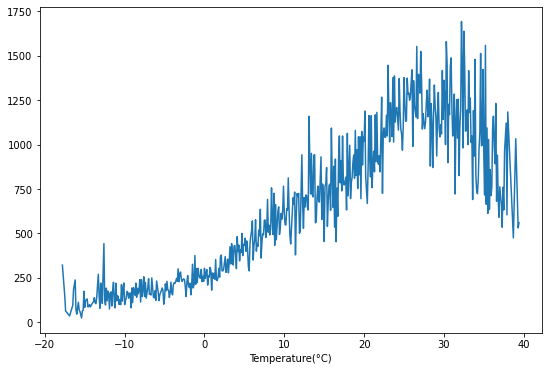

In [39]:
# Viewing the relation between temp and Rented bike count
fig = plt.figure(figsize=(9, 6))
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

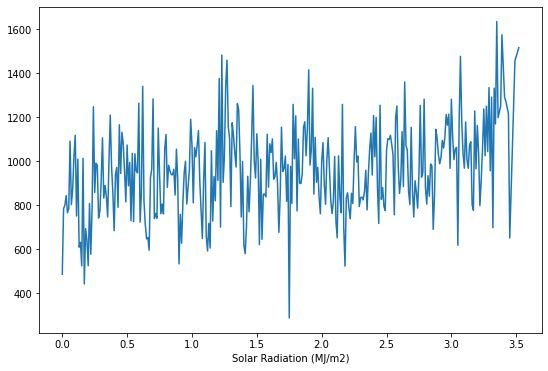

In [40]:
# Print plot between Solar Radiation and Rented Bike Count
fig = plt.figure(figsize=(9, 6))
df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

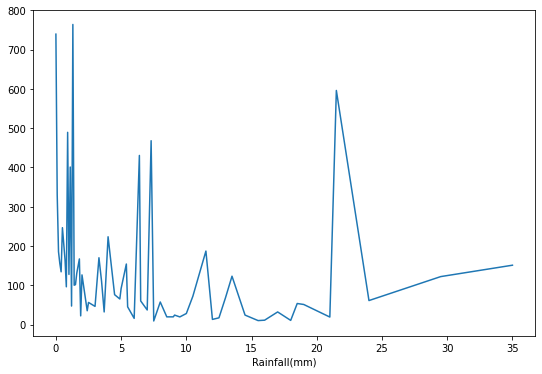

In [41]:
# Print plot Between Rainfall and Rented Bike Count
fig = plt.figure(figsize=(9, 6))
df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

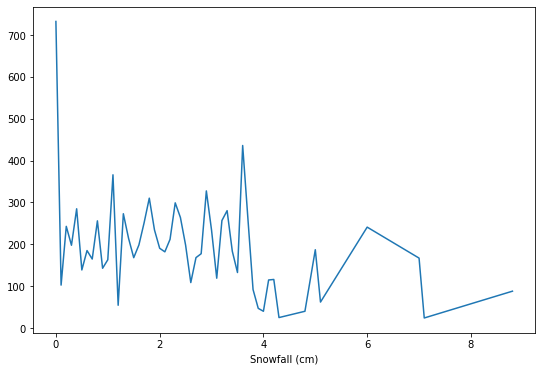

In [42]:
# Print plot Between Snowfall and Rented Bike Count
fig = plt.figure(figsize=(9, 6))
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

In [43]:
categorical_features = df.describe(include=['object','category']).columns

In [44]:
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month',
       'day'],
      dtype='object')

# **Regression plot**

Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

In [45]:
numeric_features = df.describe().columns
numeric_features 

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

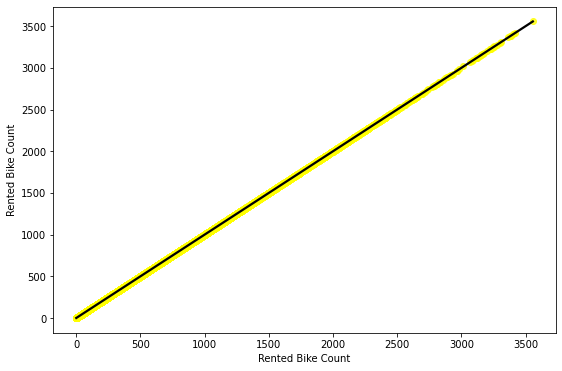

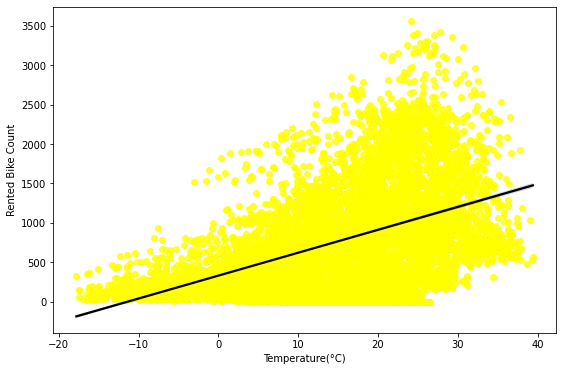

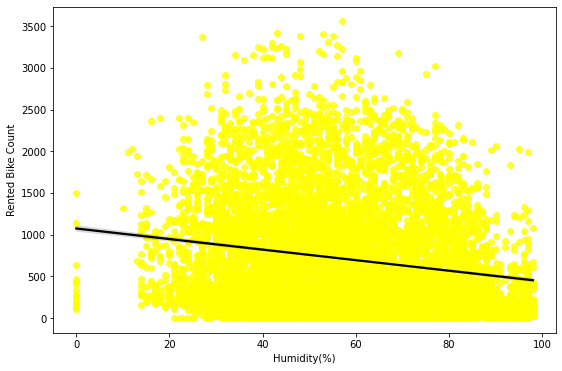

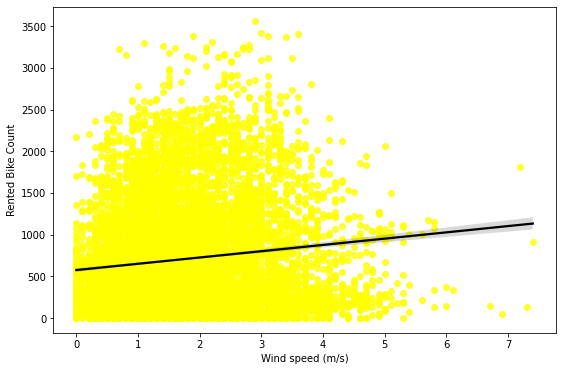

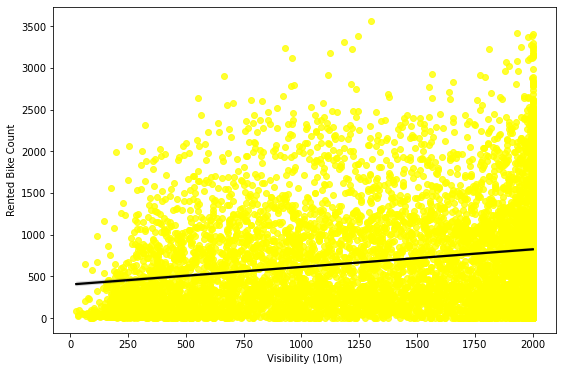

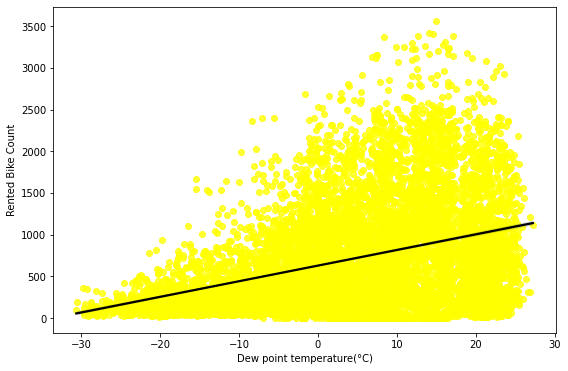

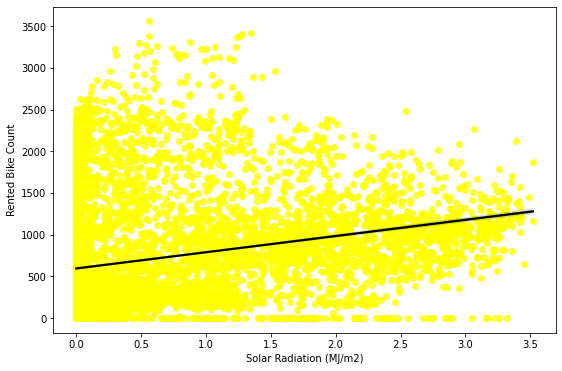

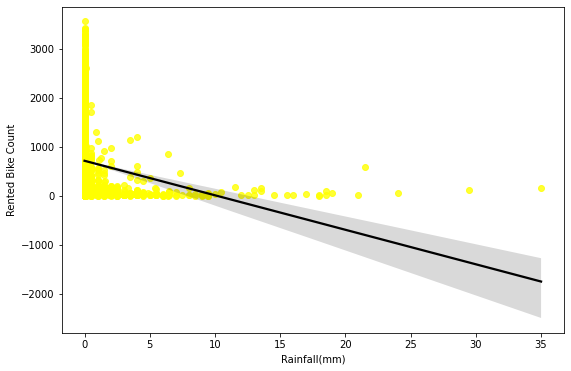

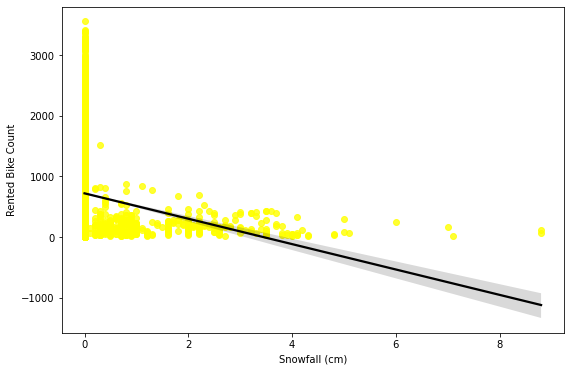

In [46]:
# Print the regression plot for all the numeric feature columns
for col in numeric_features:
   fig = plt.figure(figsize=(9, 6))
   sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": "yellow"},line_kws={"color":"black"})


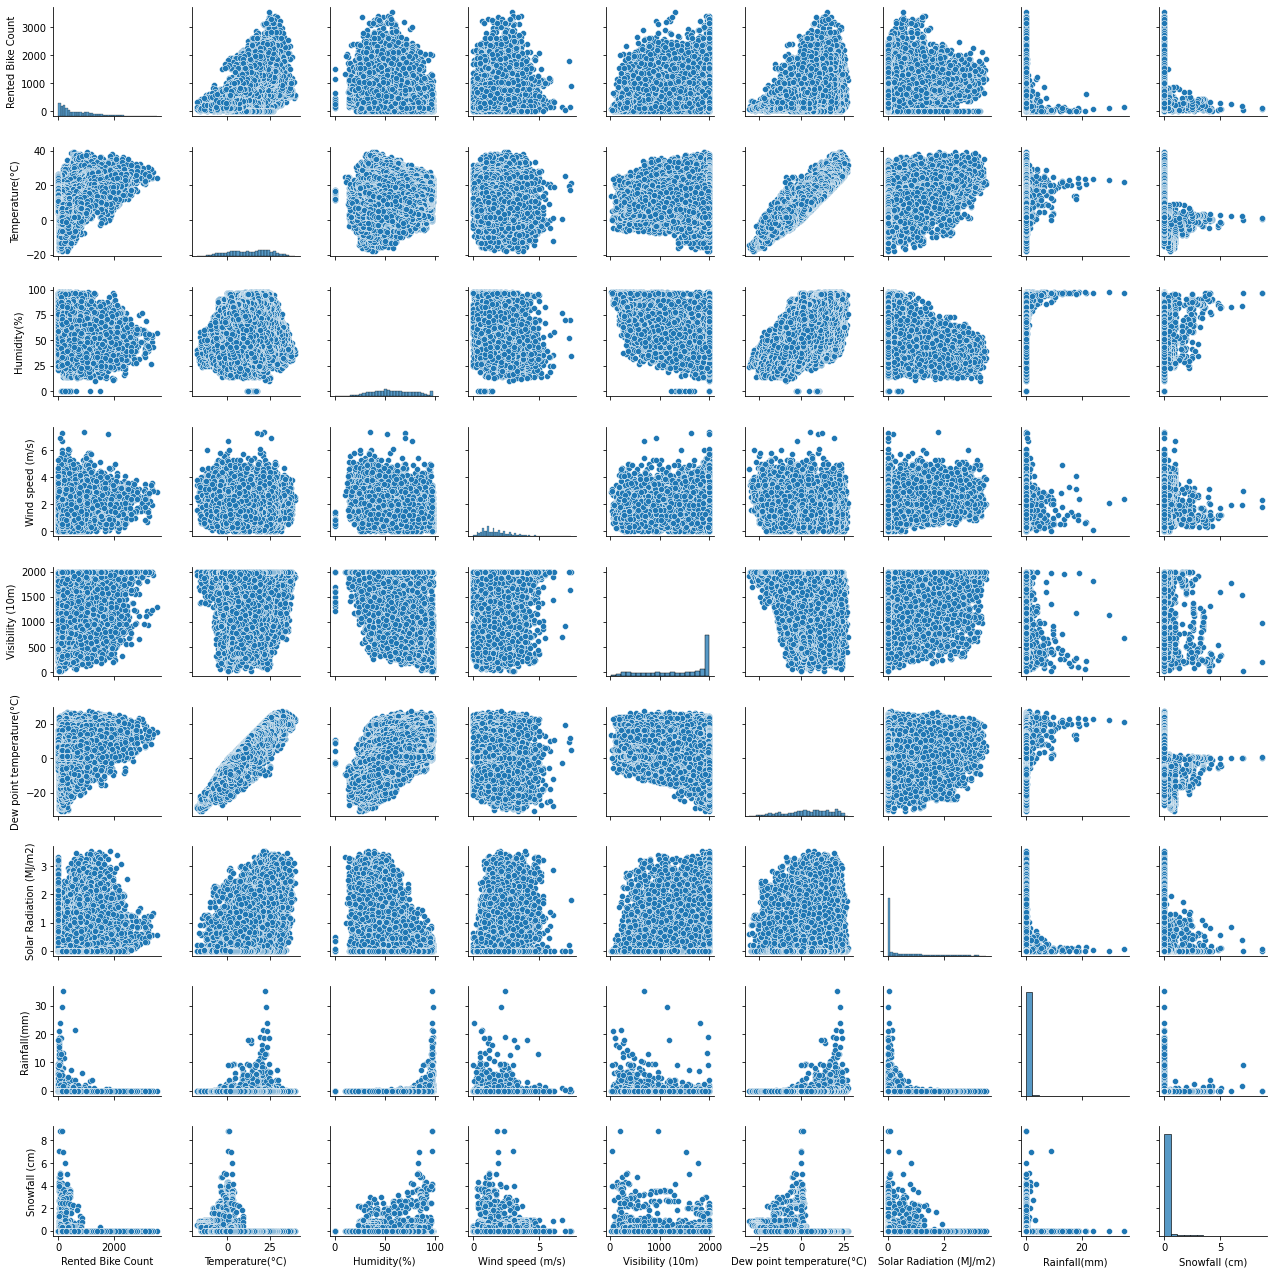

In [47]:
sns.pairplot(df,height=2)

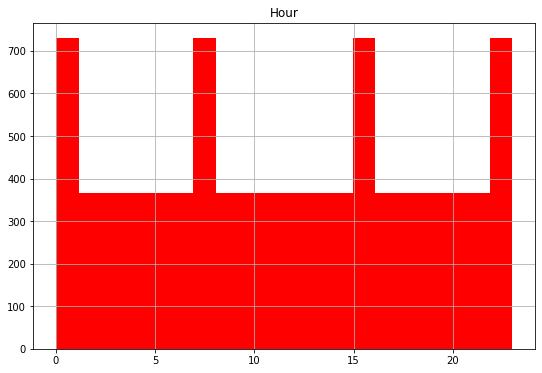

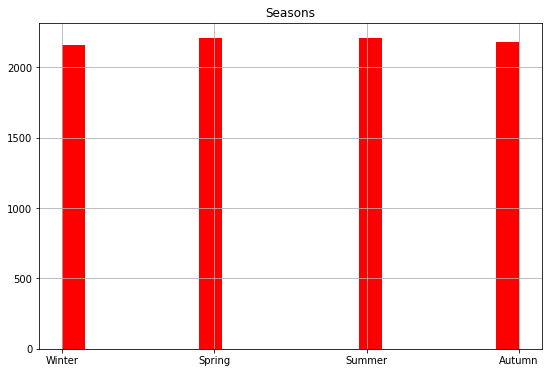

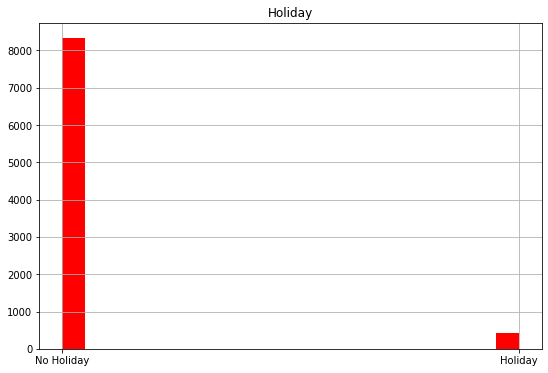

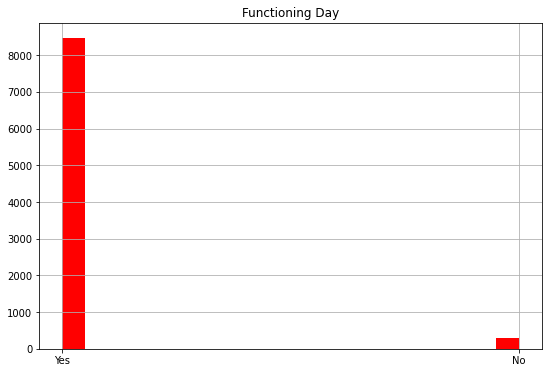

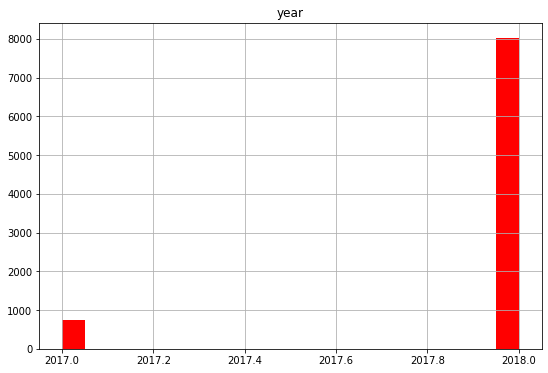

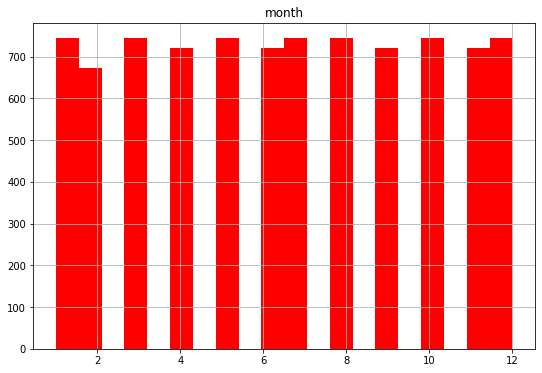

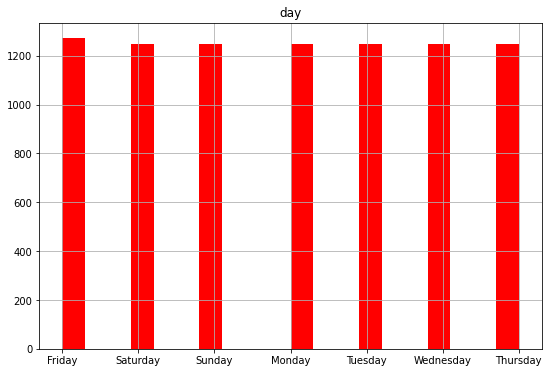

In [48]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=20,ax = ax,color='r') 
    ax.set_title(col)
plt.show()

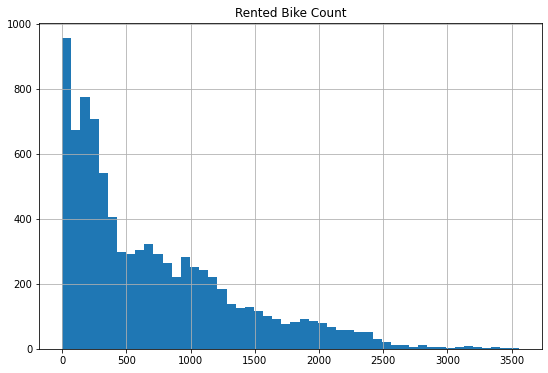

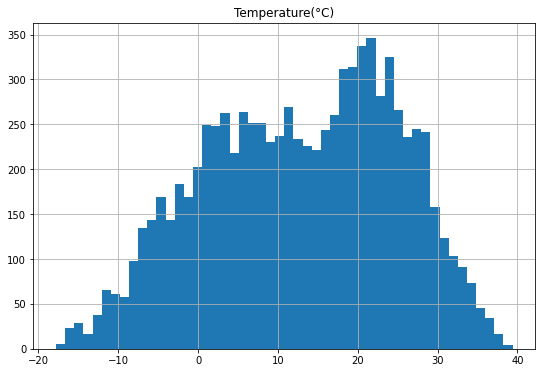

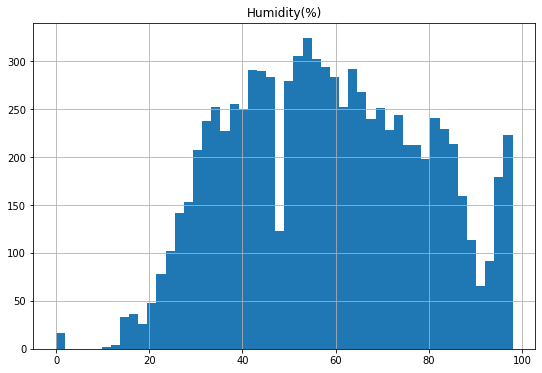

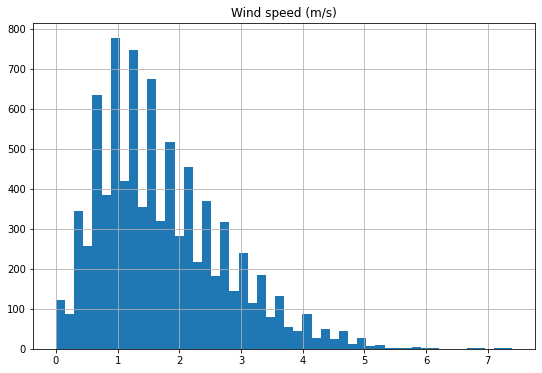

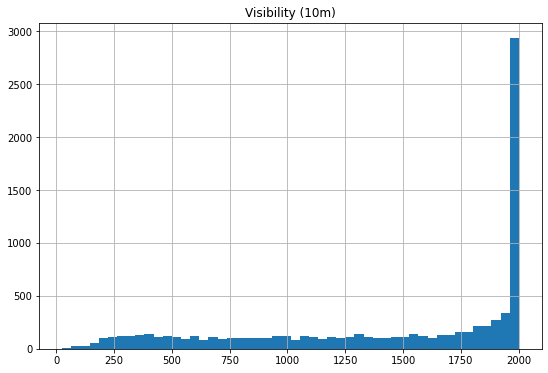

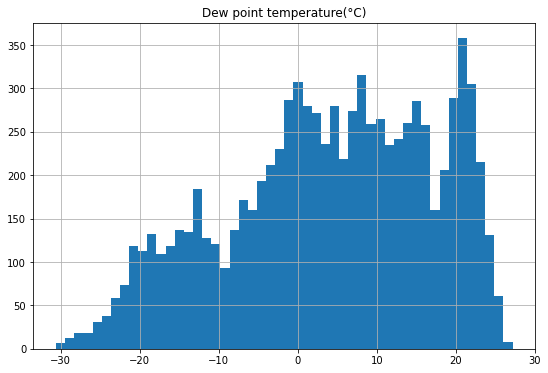

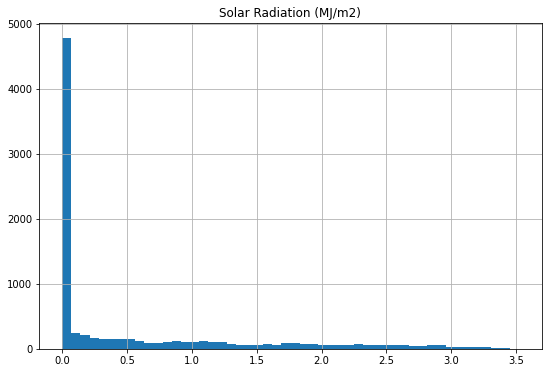

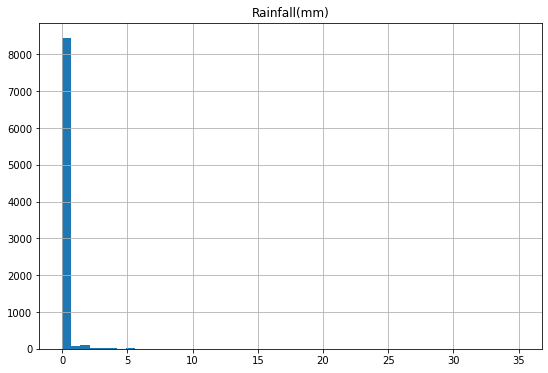

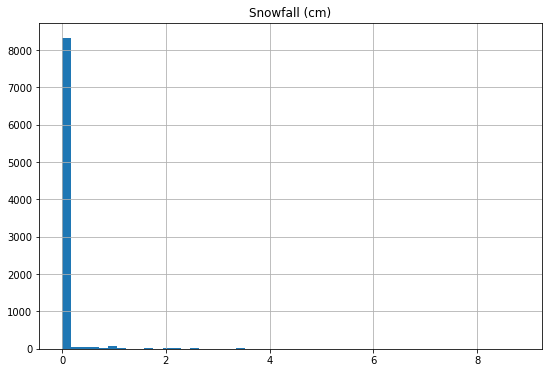

In [49]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax) 
    ax.set_title(col)
plt.show()

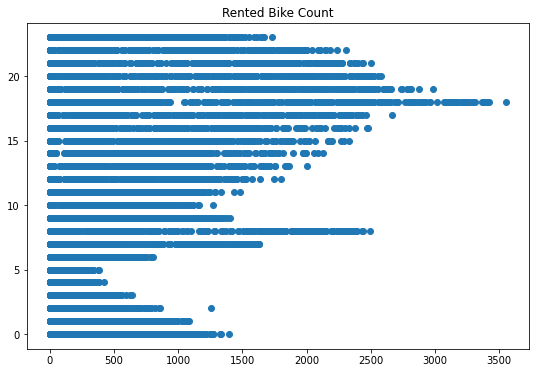

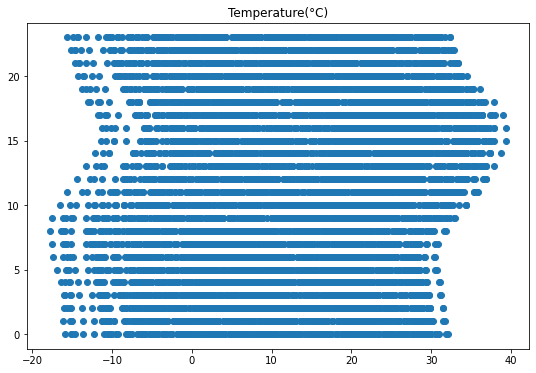

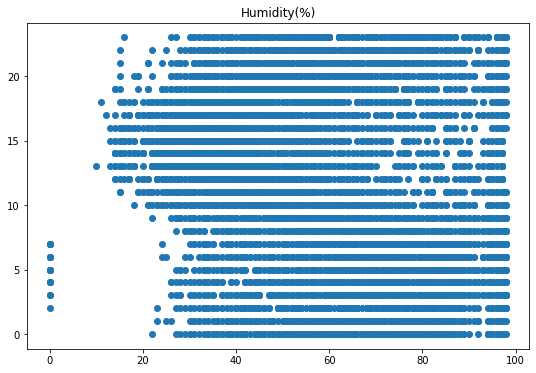

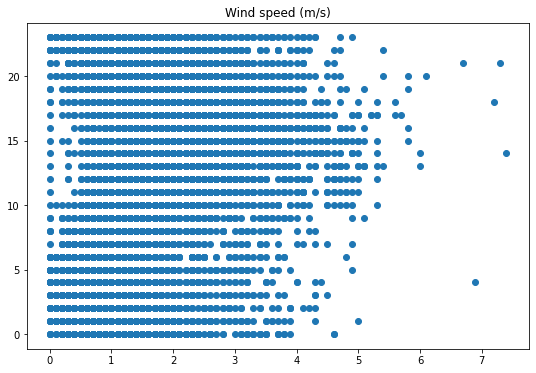

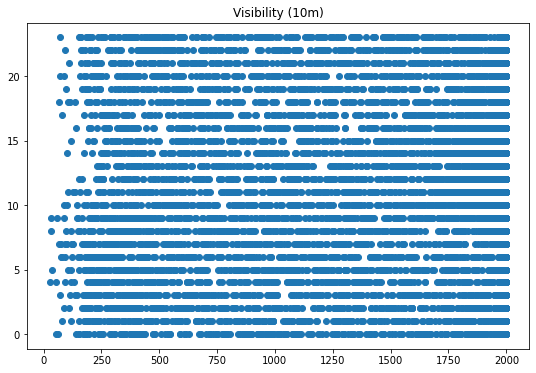

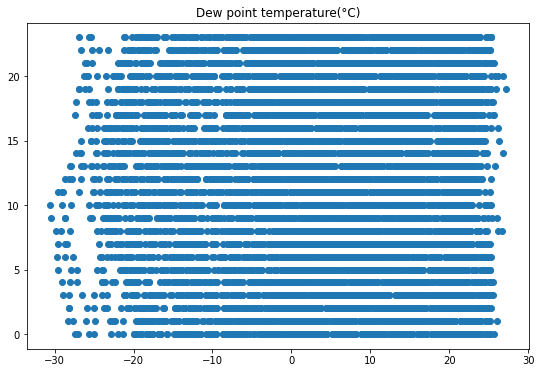

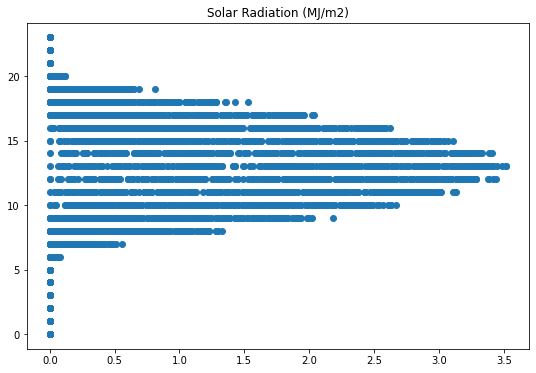

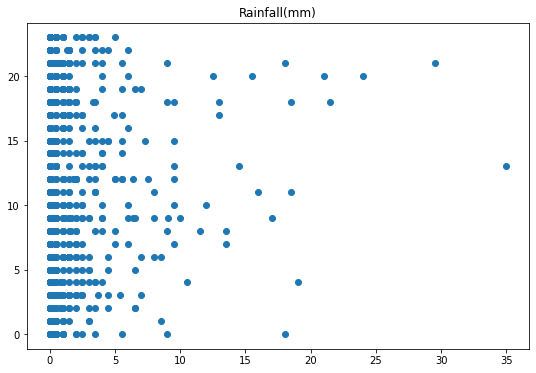

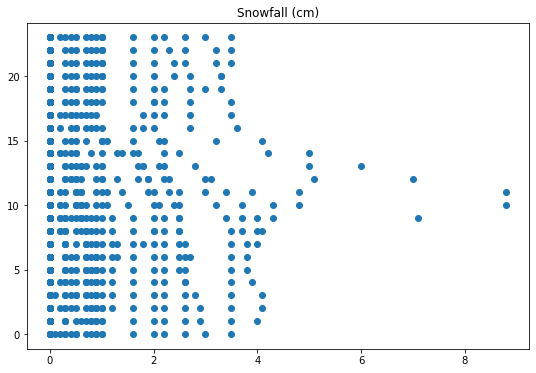

In [50]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Hour']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    ax.set_title(col)

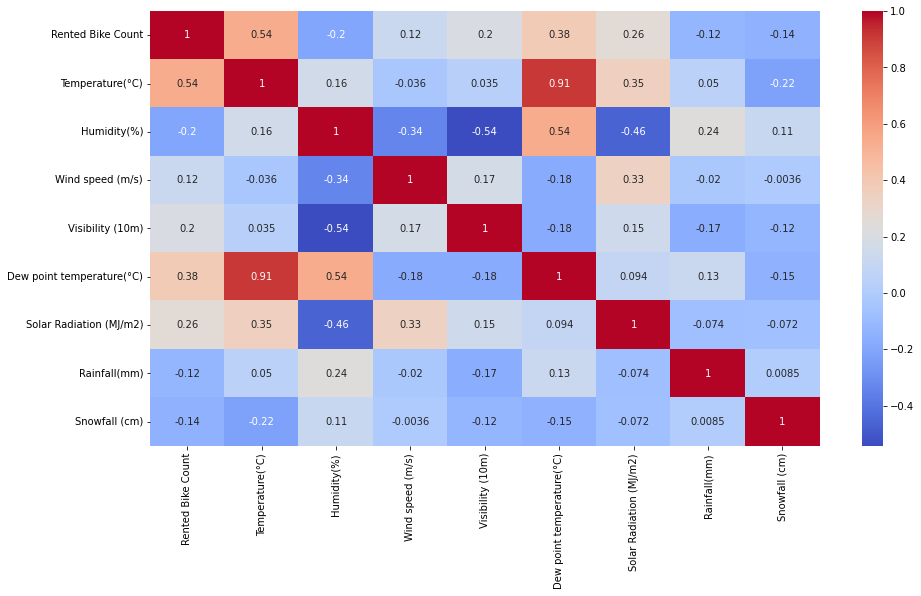

In [51]:
# Plot the corelation matrix
plt.figure(figsize=(15,8))
corr = df.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')

# **Create Dummy Variables**
dummy variable is one that takes only the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome. They can be thought of as numeric stand-ins for qualitative facts in a regression model, sorting data into mutually exclusive categories.

In [52]:
categorical_features = list(df.select_dtypes(['object','category']))
categorical_features=pd.get_dummies(df,categorical_features,drop_first=True)

In [53]:
categorical_features

Date  Rented Bike Count  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254             -5.2           37   
1    2017-12-01                204             -5.5           38   
2    2017-12-01                173             -6.0           39   
3    2017-12-01                107             -6.2           40   
4    2017-12-01                 78             -6.0           36   
...         ...                ...              ...          ...   
8755 2018-11-30               1003              4.2           34   
8756 2018-11-30                764              3.4           37   
8757 2018-11-30                694              2.6           39   
8758 2018-11-30                712              2.1           41   
8759 2018-11-30                584              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  ...  month_9  \
0                         0.0           0.0            0.0  ...        0   
1                         0.0           0.0            0.0  ...        0   
2                         0.0           0.0            0.0  ...        0   
3                         0.0           0.0            0.0  ...        0   
4                         0.0           0.0            0.0  ...        0   
...                       ...           ...            ...  ...      ...   
8755                      0.0           0.0            0.0  ...        0   
8756                      0.0           0.0            0.0  ...        0   
8757                      0.0           0.0            0.0  ...        0   
8758                      0.0           0.0            0.0  ...        0   
8759                      0.0           0.0            0.0  ...        0   

      month_10  month_11  month_12  day_Monday  day_Saturday  day_Sunday  \
0            0         0         1           0             0           0   
1            0         0         1           0             0           0   
2            0         0         1           0             0           0   
3            0         0         1           0             0           0   
4            0         0         1           0             0           0   
...        ...       ...       ...         ...           ...         ...   
8755         0         1         0           0             0           0   
8756         0         1         0           0             0           0   
8757         0         1         0           0             0           0   
8758         0         1         0           0             0           0   
8759         0         1         0           0             0           0   

      day_Thursday  day_Tuesday  day_Wednesday  
0                0            0              0  
1                0            0              0  
2                0            0              0  
3                0            0              0  
4                0            0              0  
...            ...          ...            ...  
8755             0            0              0  
8756             0            0              0  
8757             0            0              0  
8758             0       

# **One hot encoding**

One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns.


In [54]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)


In [55]:
# Create a copy of the datset
df_copy = df.copy()

In [56]:
# apply one hot encoding
df_copy = pd.get_dummies(df_copy,columns=['Seasons', 'Holiday', 'Functioning Day', 'day','Hour','month'],drop_first=True)

In [57]:
df_copy.head()

Date  Rented Bike Count  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254             -5.2           37   
1 2017-12-01                204             -5.5           38   
2 2017-12-01                173             -6.0           39   
3 2017-12-01                107             -6.2           40   
4 2017-12-01                 78             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  ... month_3  month_4  \
0                      0.0           0.0            0.0  ...       0        0   
1                      0.0           0.0            0.0  ...       0        0   
2                      0.0           0.0            0.0  ...       0        0   
3                      0.0           0.0            0.0  ...       0        0   
4                      0.0           0.0            0.0  ...       0        0   

   month_5  month_6  month_7  month_8  month_9  month_10  month_11  month_12  
0        0        0        0        0        0         0         0         1  
1        0        0        0        0        0         0         0         1  
2        0        0        0        0        0         0         0         1  
3        0        0        0        0        0         0         0         1  
4        0        0        0        0        0         0         0         1  

[5 rows x 56 columns]

In [58]:
# drop the Date column
df_copy = df_copy.drop(columns=['Date'])

# **Train-Test split**



* The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms.  
*  Generally, the training and validation data set is split into an 80:20 ratio. 



In [59]:
# Assign the value of X and y
X = df_copy.drop(columns=['Rented Bike Count'],axis=1)
y = np.sqrt(df_copy['Rented Bike Count'])


In [60]:
X.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0             -5.2           37               2.2              2000   
1             -5.5           38               0.8              2000   
2             -6.0           39               1.0              2000   
3             -6.2           40               0.9              2000   
4             -6.0           36               2.3              2000   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                      -17.6                      0.0           0.0   
1                      -17.6                      0.0           0.0   
2                      -17.7                      0.0           0.0   
3                      -17.6                      0.0           0.0   
4                      -18.6                      0.0           0.0   

   Snowfall (cm)  year  Seasons_Spring  ...  month_3  month_4  month_5  \
0            0.0  2017               0  ...        0        0        0   
1            0.0  2017               0  ...        0        0        0   
2            0.0  2017               0  ...        0        0        0   
3            0.0  2017               0  ...        0        0        0   
4            0.0  2017               0  ...        0        0        0   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  
0        0        0        0        0         0         0         1  
1        0        0        0        0         0         0         1  
2        0        0        0        0         0         0         1  
3        0        0        0        0         0         0         1  
4        0        0        0        0         0         0         1  

[5 rows x 54 columns]

In [61]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [62]:
# apply train test split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 


In [63]:
print(X_train.shape)
print(X_test.shape)

(7008, 54)
(1752, 54)


In [64]:
df_copy.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [65]:
y_train

2031    17.663522
6570    53.254108
6371    26.664583
3490    27.495454
7700    39.471509
          ...    
4373    17.492856
7891    44.362146
4859    32.649655
3264    20.024984
2732    22.649503
Name: Rented Bike Count, Length: 7008, dtype: float64

In [66]:
X_train

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
2031              8.2           62               0.6               291   
6570             28.4           57               2.4              2000   
6371             29.9           57               1.7              1992   
3490             14.8           29               0.6              1749   
7700             12.2           47               1.1              2000   
...               ...          ...               ...               ...   
4373             17.8           75               1.0              1210   
7891             16.4           47               1.0              1694   
4859             25.5           57               1.8               943   
3264              8.3           59               2.1              1912   
2732              7.1           83               3.3               203   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
2031                        1.3                     1.22           0.0   
6570                       19.0                     0.84           0.0   
6371                       20.4                     0.88           0.1   
3490                       -3.0                     2.20           0.0   
7700                        1.2                     0.00           0.0   
...                         ...                      ...           ...   
4373                       13.3                     0.00           0.0   
7891                        5.0                     0.00           0.0   
4859                       16.3                     3.01           0.0   
3264                        0.7                     0.00           0.0   
2732                        4.4                     0.00           0.0   

      Snowfall (cm)  year  Seasons_Spring  ...  month_3  month_4  month_5  \
2031            0.0  2018               0  ...        0        0        0   
6570            0.0  2018               0  ...        0        0        0   
6371            0.0  2018               0  ...        0        0        0   
3490            0.0  2018               1  ...        0        1        0   
7700            0.0  2018               0  ...        0        0        0   
...             ...   ...             ...  ...      ...      ...      ...   
4373            0.0  2018               0  ...        0        0        0   
7891            0.0  2018               0  ...        0        0        0   
4859            0.0  2018               0  ...        0        0        0   
3264            0.0  2018               1  ...        0        1        0   
2732            0.0  2018               1  ...        1        0        0   

      month_6  month_7  month_8  month_9  month_10  month_11  month_12  
2031        0        0        0        0         0         0         0  
6570        0        0        1        0         0         0         0  
6371        0        0        1        0         0         0         0  
3490        0        0        0        0         0         0         0  
7700        0        0        0        0         1         0         0  
...       ...      ...      ...      ...       ...       ...       ...  
4373        1        0        0        0         0         0         0  
7891        0        0        0        0         1         0         0  
4859        1        0        0        0         0         0         0  
3264        0        0        0        0         0         0         0  
2732        0        0        0        0         0         0         0  

[7008 rows x 54 columns]

# **Linear Regression**


In [67]:
# Apply LinearRegression 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train,y_train)

0.778441034647993

In [68]:
reg.coef_

array([ 7.96390871e-02, -2.39510661e-01, -7.03328162e-02,  1.11844989e-03,
        4.78124174e-01,  1.08932146e+00, -1.46768101e+00,  1.60916456e-02,
       -1.03497903e+00, -4.08113517e-01, -1.52849242e+00, -4.55839477e+00,
        3.27748562e+00,  2.86093451e+01, -1.33917633e+00, -1.12217294e+00,
       -2.73571538e+00, -5.59833683e-01, -4.83987901e-01, -4.18624271e-01,
       -1.95929840e+00, -4.87413811e+00, -7.22399831e+00, -9.43651589e+00,
       -9.10002442e+00, -4.03133961e+00,  2.14993689e+00,  7.51985474e+00,
        1.17323761e+00, -3.33772774e+00, -3.52772827e+00, -2.76998342e+00,
       -2.83703357e+00, -2.74697680e+00, -1.54831907e+00,  3.70326465e-01,
        4.02687345e+00,  1.05462087e+01,  6.89056341e+00,  6.04978422e+00,
        6.34599641e+00,  5.06243893e+00,  1.53494667e+00, -7.16324809e-01,
       -1.47209282e+00, -3.61594088e-01,  1.42557339e+00,  4.41184694e+00,
       -1.84699286e+00, -4.09334650e+00,  2.75651421e-01,  3.36273259e+00,
        2.85661670e+00,  

In [69]:
len(reg.coef_)

54

In [70]:
reg.intercept_

2092.5481670668983

In [71]:
y_pred = reg.predict(X_test)

In [72]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [73]:
y_pred

array([16.90067383, 23.7545425 , 19.1922171 , ..., 20.50756219,
       34.57430659, 28.21826088])

**Calculate the value on train data**

In [74]:
# Calculate the value of Mean squre error (MSE)
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE:' ,MSE)


MSE: 34.19388697470096


In [75]:
# Calculate the value of  Root mean squre Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


RMSE : 5.847553930892896


In [76]:
# Calculate the mean absolute error (MAE)
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE:',MAE)

MAE: 4.398692851601256


In [77]:
from sklearn.metrics import r2_score
r2 = r2_score((y_train), (y_pred_train))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred_train)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.778441034647993
Adjusted R2 :  0.7713908377540576


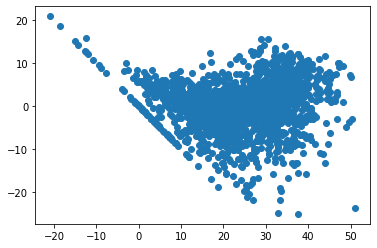

In [78]:
# Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

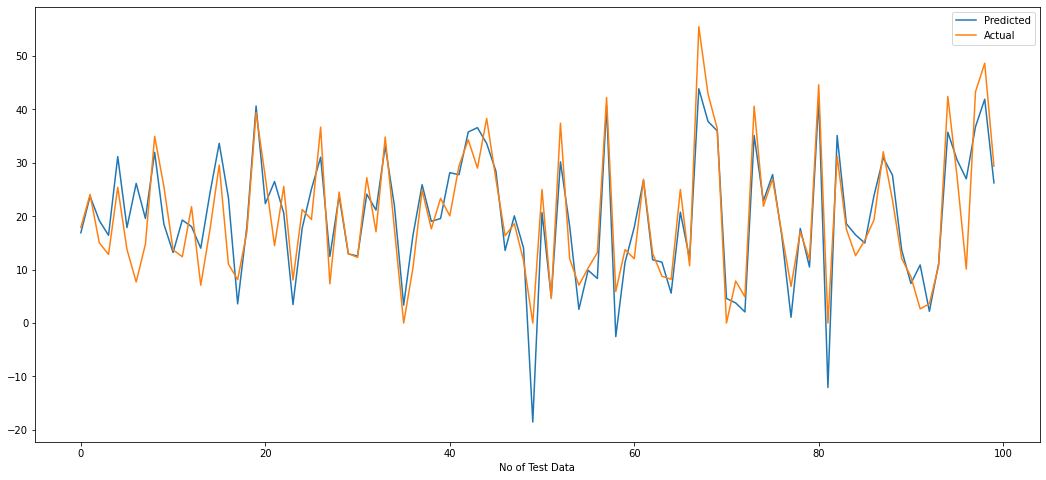

In [79]:
plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_test)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

**Calculate the value on test data**

In [80]:
# Calculate the value of Mean squre error (MSE)
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE:' ,MSE)
# Calculate the value of  Root mean squre Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
# Calculate the mean absolute error (MAE)
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE:',MAE)
from sklearn.metrics import r2_score
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE: 33.515173741831845
RMSE : 5.7892291146431445
MAE: 4.384428327762863
R2 : 0.787186676840818
Adjusted R2 :  0.7804147738056997


# **Lasso Regression**

In [81]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=1.0, max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(max_iter=3000)

In [82]:
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.38354931956674243 0.4059516284119845


In [83]:
lasso.coef_

array([ 3.97819412e-01, -2.37292448e-01,  0.00000000e+00,  2.46765494e-04,
        2.27557612e-01, -0.00000000e+00, -5.03535346e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

 **Get X_train  X_test split for lasso regression**

In [84]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

**Calculate the value on train data for lasso regression**

In [85]:
#calculate MSE for lasso
MSE_lasso= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_lasso)

MSE : 91.68134019453143


In [86]:
#calculate Root mean squre error (RMSE) for lasso
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)

RMSE : 9.575037346900086


In [87]:
#calculate mean absolute error (MAE)  for lasso
MAE_lasso= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_lasso)

MAE : 7.25236195572733


In [88]:
#calculate r2 and adjusted r2 for lasso
r2_lasso= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_lasso)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

R2 : 0.4059516284119845
Adjusted R2 : 0.3870484981434207


**Calculate the value on test data for lasso regression**

In [89]:
#calculate MSE for lasso
MSE_lasso= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE_lasso)
#calculate Root mean squre error (RMSE) for lasso
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)
#calculate mean absolute error (MAE)  for lasso
MAE_lasso= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_lasso)
#calculate r2 and adjusted r2 for lasso
r2_lasso= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2_lasso)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 97.08251039591772
RMSE : 9.853045742100141
MAE : 7.442888428031137
R2 : 0.38354931956674243
Adjusted R2 : 0.3639333285570807


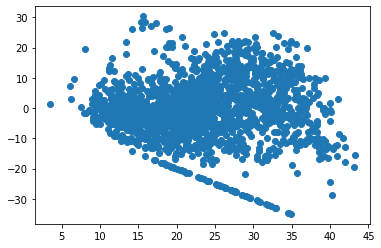

In [90]:
# Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

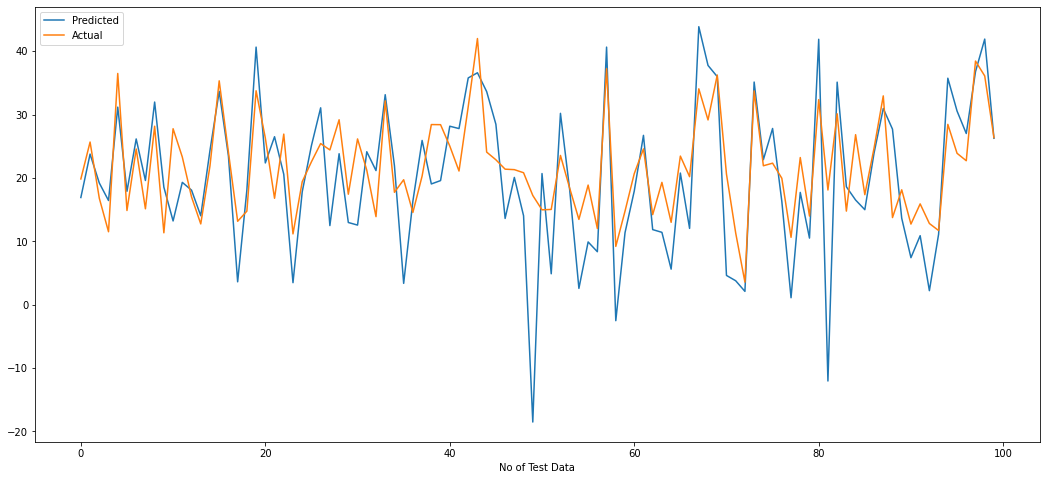

In [91]:

plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_pred_test_lasso)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Ridge Regression**



*   Ridge regression is the method used for the analysis of multicollinearity in multiple regression data. 
*   It is most suitable when a data set contains a higher number of predictor variables than the number of observations.


*   The second-best scenario is when multicollinearity is experienced in a set.






In [92]:
from sklearn.linear_model import Ridge
ridge= Ridge()

In [93]:
ridge.fit(X_train,y_train)

Ridge()

In [94]:
#check the score
ridge.score(X_train, y_train)

0.7784343758340351

In [95]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

**Calculate the value on train data for redge regression**

In [96]:

#calculate Mean sqqure error for redge regression
MSE_ridge= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_ridge)

#calculate Root mean squre error for redge regression
RMSE_ridge=np.sqrt(MSE_ridge)
print("RMSE :",RMSE_ridge)


#calculate mean absolute error for redge regression
MAE_ridge= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_ridge)

#calculate r2 and adjusted r2
r2_ridge= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_ridge)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 34.194914650252244
RMSE : 5.8476418024920305
MAE : 4.399430563227578
R2 : 0.7870901022812925
Adjusted R2 : 0.7713839670509107


**Calculate the value on test data for redge regression**

In [97]:
#calculate Mean squre error for redge regression
MSE_ridge= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_ridge)

MSE : 33.53038290775007


In [98]:
#calculate root mean squre error for redge regression
RMSE_ridge=np.sqrt(MSE_ridge)
print("RMSE :",RMSE_ridge)

RMSE : 5.790542540017305


In [99]:
#calculate mean absolute error for redge regression
MAE_ridge= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_ridge)

MAE : 4.386514540627386


In [100]:
#calculate r2 
r2_ridge= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_ridge)

R2 : 0.7870901022812925


In [101]:
#calculate adjusted r2
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Adjusted R2 : 0.780315126160603


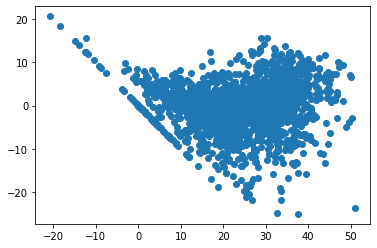

In [102]:
# Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test-y_pred_test_ridge))

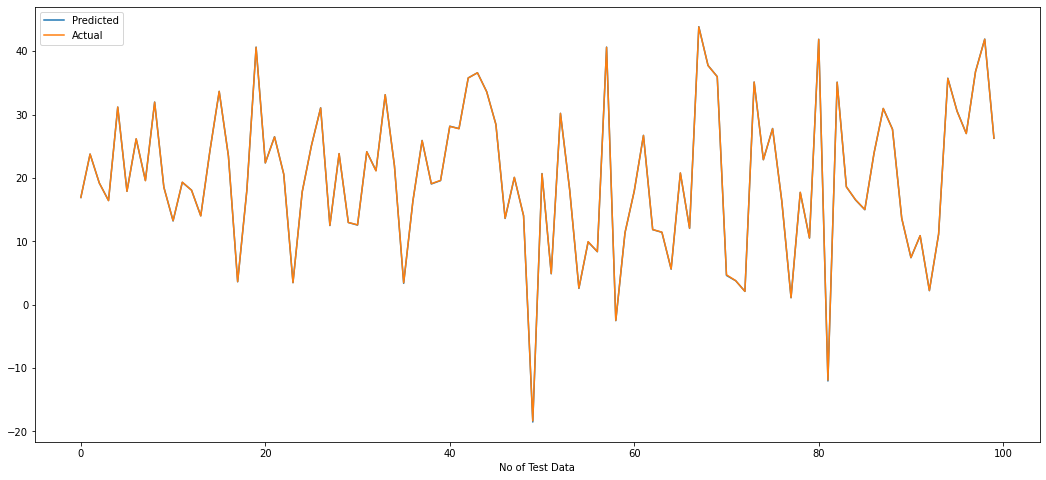

In [103]:
plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_pred_test_ridge)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Elastic Regression**

In [104]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [105]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [106]:
elasticnet.score(X_train, y_train)

0.6301510464635889

In [107]:
y_pred_train_elastic=elasticnet.predict(X_train)
y_pred_test_elastic=elasticnet.predict(X_test)

**Calculate the value on train data for elastic regression**

In [108]:

#calculate Mean squre error for elastic regression
MSE_elastic= mean_squared_error((y_train), (y_pred_train_elastic))
print("MSE :",MSE_elastic)

#calculate Root mean squre for elastic regression
RMSE_elastic=np.sqrt(MSE_elastic)
print("RMSE :",RMSE_elastic)


#calculate mean absolute error for elastic regression
MAE_elastic= mean_absolute_error(y_train, y_pred_train_elastic)
print("MAE :",MAE_elastic)



#calculate r2 
r2_elastic= r2_score(y_train, y_pred_train_elastic)
print("R2 :",r2_elastic)
# calculate adjusted r2
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.079943909482175
RMSE : 7.5551269949274955
MAE : 5.7474859198465955
R2 : 0.6301510464635889
Adjusted R2 : 0.6183821345655534


**Calculate the value on test data for elastic regression**





In [109]:
#calculate Mean squre error for elastic regression
MSE_elastic= mean_squared_error((y_test), (y_pred_test_elastic))
print("MSE :",MSE_elastic)

#calculate Root mean squre for elastic regression
RMSE_elastic=np.sqrt(MSE_elastic)
print("RMSE :",RMSE_elastic)


#calculate mean absolute error for elastic regression
MAE_elastic= mean_absolute_error(y_test, y_pred_test_elastic)
print("MAE :",MAE_elastic)


#calculate r2 
r2_elastic= r2_score(y_test, y_pred_test_elastic)
print("R2 :",r2_elastic)

# calculate adjusted r2
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 59.7362695667946
RMSE : 7.728924217948744
MAE : 5.840645682783431
R2 : 0.6206890008218877
Adjusted R2 : 0.6086189984909401


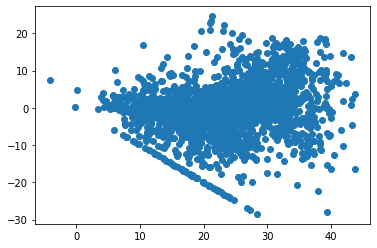

In [110]:
# Heteroscadacity
plt.scatter((y_pred_test_elastic),(y_test-y_pred_test_elastic))

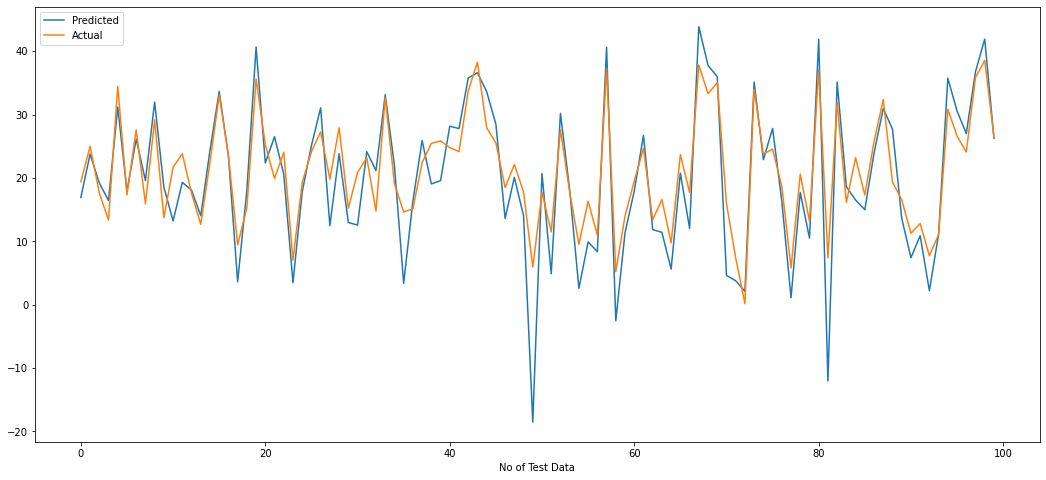

In [111]:
plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_pred_test_elastic)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Decision Tree**

In [112]:
from sklearn.tree import DecisionTreeRegressor

In [113]:
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,max_features=9, max_leaf_nodes=100,)

In [114]:
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [115]:
decision_regressor.score(X_train,y_train)

0.6435337552232234

In [116]:
y_pred_train_decision = decision_regressor.predict(X_train)
y_pred_test_decision = decision_regressor.predict(X_test)

**Calculate the value on train data for Decision tree**

In [117]:
#calculate Mean squre error for Decision tree
MSE_decision= mean_squared_error((y_train), (y_pred_train_decision))
print("MSE :",MSE_decision)

#calculate Root mean squre for decision tree
RMSE_decision=np.sqrt(MSE_decision)
print("RMSE :",RMSE_decision)


#calculate mean absolute error for decision tree
MAE_decision= mean_absolute_error(y_train, y_pred_train_decision)
print("MAE :",MAE_decision)



#calculate r2 
r2_decision= r2_score(y_train, y_pred_train_decision)
print("R2 :",r2_decision)
# calculate adjusted r2
print("Adjusted_R2_decision :",1-(1-r2_score(y_train, y_pred_train_decision))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 55.0145486770426
RMSE : 7.417179293844972
MAE : 5.558343923523492
R2 : 0.6435337552232234
Adjusted_R2_decision : 0.632190692631623


**Calculate the value on test data for Decision tree**

In [118]:
#calculate Mean squre error for Decision tree
MSE_decision= mean_squared_error((y_test), (y_pred_test_decision))
print("MSE :",MSE_decision)

#calculate Root mean squre for decision tree
RMSE_decision=np.sqrt(MSE_decision)
print("RMSE :",RMSE_decision)


#calculate mean absolute error for decision tree
MAE_decision= mean_absolute_error(y_test, y_pred_test_decision)
print("MAE :",MAE_decision)



#calculate r2 
r2_decision= r2_score(y_test, y_pred_test_decision)
print("R2 :",r2_decision)
# calculate adjusted r2
print("Adjusted_R2_decision :",1-(1-r2_score(y_train, y_pred_train_decision))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 64.3744296370314
RMSE : 8.023367724156197
MAE : 6.0042081206152345
R2 : 0.591237795660468
Adjusted_R2_decision : 0.632190692631623


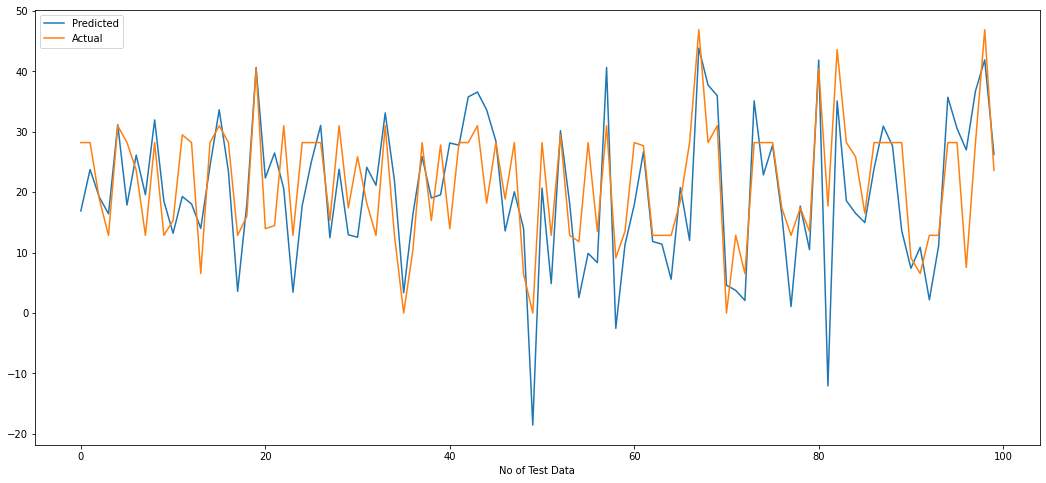

In [119]:
plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_pred_test_decision)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

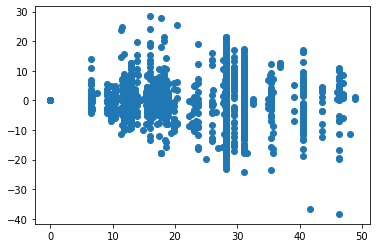

In [120]:
# Heteroscadacity
plt.scatter((y_pred_test_decision),(y_test-y_pred_test_decision))

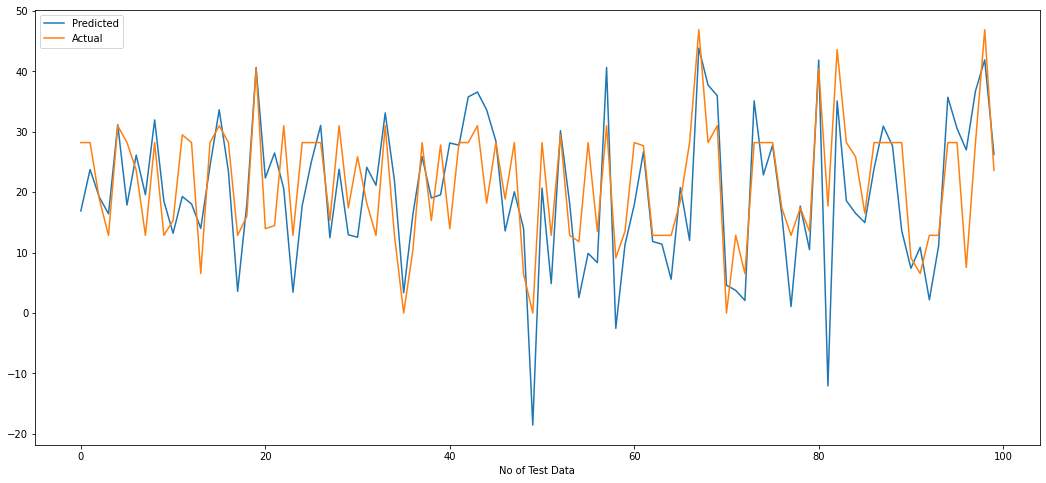

In [121]:
plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_pred_test_decision)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Random Forest**

**Random Forest**

Random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

 





In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
random_forest_model = RandomForestRegressor()

In [124]:
random_forest_model.fit(X_train,y_train)

RandomForestRegressor()

In [125]:
y_pred_train_random_forest = random_forest_model.predict(X_train)
y_pred_test_random_forest = random_forest_model.predict(X_test)

In [126]:
random_forest_model.score(X_train,y_train)

0.9890435217918442

**Calculate the value on train data for Random forest**

In [127]:
#calculate Mean squre error for Random forest
MSE_random_forest= mean_squared_error((y_train), (y_pred_train_random_forest))
print("MSE :",MSE_random_forest)

#calculate Root mean squre for Random forest
RMSE_random_forest=np.sqrt(MSE_random_forest)
print("RMSE :",RMSE_random_forest)


#calculate mean absolute error for Random forest
MAE_random_forest= mean_absolute_error(y_train, y_pred_train_random_forest)
print("MAE :",MAE_random_forest)



#calculate r2 
r2_random_forest= r2_score(y_train, y_pred_train_random_forest)
print("R2 :",r2_random_forest)
# calculate adjusted r2
print("Adjusted_R2_random_forest :",1-(1-r2_score(y_train, y_pred_train_random_forest))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 1.6909474951520338
RMSE : 1.3003643701486263
MAE : 0.8339082576298337
R2 : 0.9890435217918442
Adjusted_R2_random_forest : 0.9886948772289447


**Calculate the value on test data for Random forest**

In [128]:
#calculate Mean squre error for Random forest
MSE_random_forest= mean_squared_error((y_test), (y_pred_test_random_forest))
print("MSE :",MSE_random_forest)

#calculate Root mean squre for Random forest
RMSE_random_forest=np.sqrt(MSE_random_forest)
print("RMSE :",RMSE_random_forest)


#calculate mean absolute error for Random forest
MAE_random_forest= mean_absolute_error(y_test, y_pred_test_random_forest)
print("MAE :",MAE_random_forest)



#calculate r2 
r2_random_forest= r2_score(y_test, y_pred_test_random_forest)
print("R2 :",r2_random_forest)
# calculate adjusted r2
print("Adjusted_R2_random_forest :",1-(1-r2_score(y_test, y_pred_test_random_forest))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 13.677531765061355
RMSE : 3.6983147195799
MAE : 2.291701795810166
R2 : 0.9131509503737132
Adjusted_R2_random_forest : 0.9103873388947388


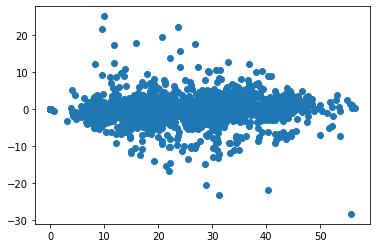

In [129]:
# Heteroscadacity
plt.scatter((y_pred_test_random_forest),(y_test)-(y_pred_test_random_forest))

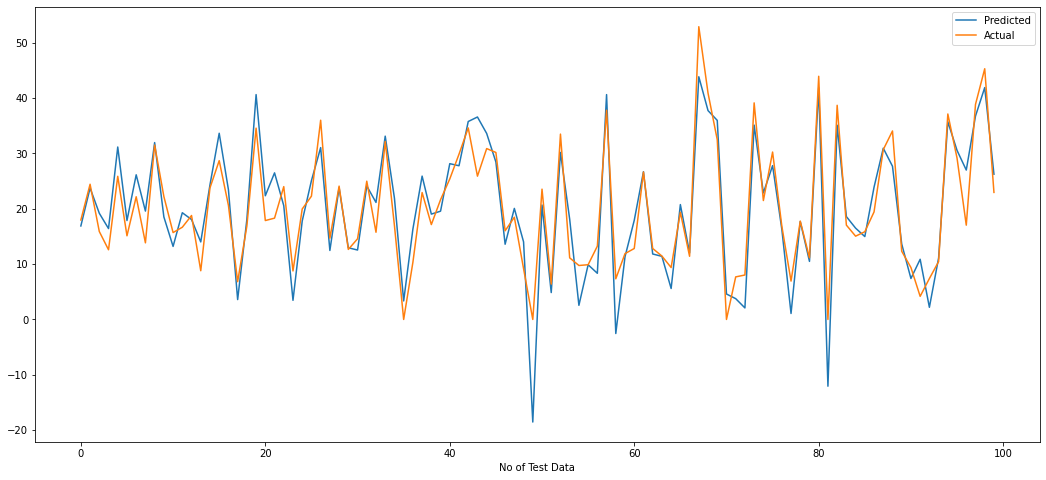

In [130]:
plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_pred_test_random_forest)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [131]:
random_forest_model.feature_importances_

array([3.08151137e-01, 1.48989007e-01, 1.13035612e-02, 1.08413683e-02,
       1.90138453e-02, 3.07061088e-02, 3.00200255e-02, 1.27381843e-03,
       4.11379339e-04, 3.63661462e-03, 8.19468854e-04, 1.05153037e-02,
       3.32200411e-03, 1.52074916e-01, 1.76830648e-03, 7.29246071e-03,
       1.06202641e-02, 1.33974193e-03, 1.10236931e-03, 1.54121302e-03,
       4.72179288e-03, 1.32171183e-02, 1.97357454e-02, 2.98191362e-02,
       2.56081144e-02, 8.51004615e-03, 3.56718051e-03, 1.42331047e-02,
       8.14117248e-04, 1.86545087e-03, 9.14092566e-04, 1.90267214e-04,
       1.72196579e-04, 2.67170464e-04, 1.37027466e-03, 3.18084308e-03,
       1.01710575e-02, 3.21604134e-02, 1.64236946e-02, 1.17497127e-02,
       1.24090621e-02, 1.00996034e-02, 4.06385951e-03, 2.57967460e-04,
       4.05790348e-03, 1.03987626e-03, 1.29714452e-03, 1.95814202e-03,
       5.28188971e-04, 1.27097025e-03, 7.36448358e-04, 3.21193301e-03,
       5.13835203e-03, 4.96106344e-04])

In [132]:
importances = random_forest_model.feature_importances_

In [133]:
importance_dict = {'Feature' : list(X_train.columns),'Feature Importance' : importances}

In [134]:
importance_df = pd.DataFrame(importance_dict)

In [135]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [136]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0             Temperature(°C)                0.31
13        Functioning Day_Yes                0.15
1                 Humidity(%)                0.15
37                    Hour_18                0.03
23                     Hour_4                0.03
24                     Hour_5                0.03
5     Solar Radiation (MJ/m2)                0.03
6                Rainfall(mm)                0.03
38                    Hour_19                0.02
4   Dew point temperature(°C)                0.02
22                     Hour_3                0.02
21                     Hour_2                0.01
39                    Hour_20                0.01
36                    Hour_17                0.01
40                    Hour_21                0.01
25                     Hour_6                0.01
41                    Hour_22                0.01
52                   month_11                0.01
27                     Hour_8                0.01
11             Seasons_Winter                0.01
2            Wind speed (m/s)                0.01
16                 day_Sunday                0.01
15               day_Saturday                0.01
3            Visibility (10m)                0.01
45                    month_4                0.00
7               Snowfall (cm)                0.00
42                    Hour_23                0.00
43                    month_2                0.00
44                    month_3                0.00
47                    month_6                0.00
46                    month_5                0.00
9              Seasons_Spring                0.00
48                    month_7                0.00
49                    month_8                0.00
50                    month_9                0.00
51                   month_10                0.00
8                        year                0.00
19              day_Wednesday                0.00
10             Seasons_Summer                0.00
20                     Hour_1                0.00
35                    Hour_16                0.00
34                    Hour_15                0.00
33                    Hour_14                0.00
32                    Hour_13                0.00
31                    Hour_12                0.00
30                    Hour_11                0.00
29                    Hour_10                0.00
28                     Hour_9                0.00
12         Holiday_No Holiday                0.00
26                     Hour_7                0.00
14                 day_Monday                0.00
17               day_Thursday                0.00
18                day_Tuesday                0.00
53                   month_12                0.00

In [137]:
features = X_train.columns
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)

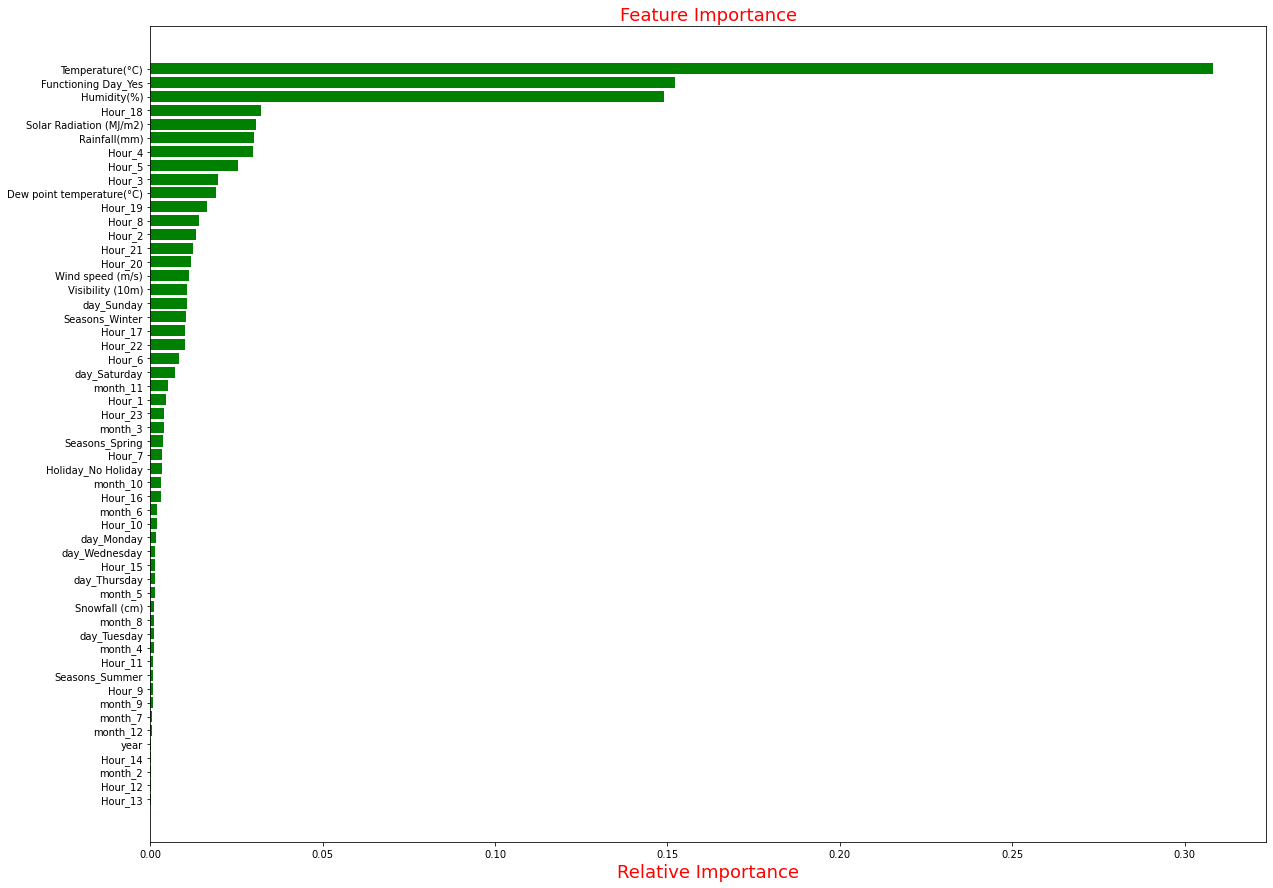

In [138]:
#Plot the figure
plt.figure(figsize=(20,15))
plt.title('Feature Importance',color='red',size=18)
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance',color='red',size=18)

plt.show()

# **Gradient Boosting**

In [139]:
from sklearn.ensemble import GradientBoostingRegressor

In [140]:
gradient_boosting_model = GradientBoostingRegressor()

In [141]:
gradient_boosting_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [142]:
y_pred_train_gradient_boosting = gradient_boosting_model.predict(X_train)
y_pred_test_gradient_boosting = gradient_boosting_model.predict(X_test)

In [143]:
gradient_boosting_model.score(X_train,y_train)

0.8764130124279189

**Calculate the value on train data for Gradient boosting**

In [144]:
#calculate Mean squre error for gradient boosting
MSE_gradient_boosting= mean_squared_error((y_train), (y_pred_train_gradient_boosting))
print("MSE :",MSE_gradient_boosting)

#calculate Root mean squre for gradient boosting
RMSE_gradient_boosting=np.sqrt(MSE_gradient_boosting)
print("RMSE :",RMSE_gradient_boosting)


#calculate mean absolute error for gradient boosting
MAE_gradient_boosting= mean_absolute_error(y_train, y_pred_train_gradient_boosting)
print("MAE :",MAE_gradient_boosting)



#calculate r2 
r2_gradient_boosting= r2_score(y_train, y_pred_train_gradient_boosting)
print("R2 :",r2_gradient_boosting)
# calculate adjusted r2
print("Adjusted_R2_gradient_boosting :",1-(1-r2_score(y_train, y_pred_train_gradient_boosting))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 19.073565711364836
RMSE : 4.367329356868432
MAE : 3.3049241915051493
R2 : 0.8764130124279189
Adjusted_R2_gradient_boosting : 0.8724803681563265


**Calculate the value on test data for Gradient boosting**

In [145]:
#calculate Mean squre error for gradient boosting
MSE_gradient_boosting= mean_squared_error((y_test), (y_pred_test_gradient_boosting))
print("MSE :",MSE_gradient_boosting)

#calculate Root mean squre for gradient boosting
RMSE_gradient_boosting=np.sqrt(MSE_gradient_boosting)
print("RMSE :",RMSE_gradient_boosting)


#calculate mean absolute error for gradient boosting
MAE_gradient_boosting= mean_absolute_error(y_test, y_pred_test_gradient_boosting)
print("MAE :",MAE_gradient_boosting)



#calculate r2 
r2_gradient_boosting= r2_score(y_test, y_pred_test_gradient_boosting)
print("R2 :",r2_gradient_boosting)
# calculate adjusted r2
print("Adjusted_R2_gradient_boosting :",1-(1-r2_score(y_test, y_pred_test_gradient_boosting))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 21.936809745923288
RMSE : 4.683674812145191
MAE : 3.5206640740626582
R2 : 0.860706514085178
Adjusted_R2_gradient_boosting : 0.8562740755233628


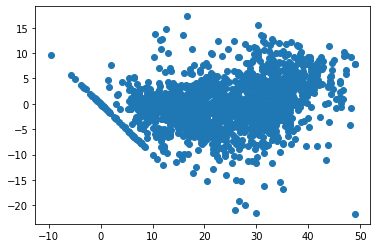

In [146]:
# Heteroscadacity
plt.scatter((y_pred_test_gradient_boosting),(y_test)-(y_pred_test_gradient_boosting))

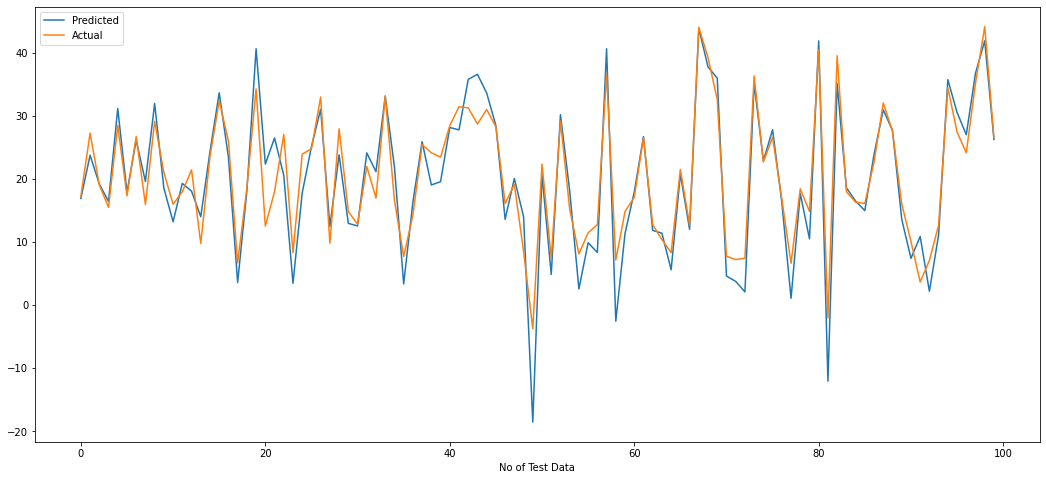

In [147]:
plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_pred_test_gradient_boosting)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Hyperparameter Tuning**

**Hyperparameter Tuning**


* Hyperparameter tuning is an essential part of controlling the behavior of a machine learning model.  
*  Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model is being trained.

In [148]:
n_estimators = [50,80,100]
max_depth = [4,6,8]
min_samples_split = [50,100,150]
min_samples_leaf = [40,50]


param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [149]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [150]:
from sklearn.model_selection import GridSearchCV
gradient_boosting_model = GradientBoostingRegressor()

# Grid search
gradient_boosting_grid = GridSearchCV(estimator=gradient_boosting_model,param_grid = param_dict,cv = 5, verbose=2)

gradient_boosting_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)